<a href="https://colab.research.google.com/github/alvaroiramirez/Harvard_DataMining_Business_Student/blob/master/Cases/Fall/I%20Ok%20Cupid/Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI E-96: Data Mining for Business
## Case I: OKCupid

## **Harvard University Extension School**

### Alvaro Ramirez

**Oct. 7, 2024**

---
---

# Exploratory Data Analysis (EDA)

## Environment Setup

Let's start by checking what R version we are running.

In [1]:
version

               _                           
platform       aarch64-apple-darwin20.0.0  
arch           aarch64                     
os             darwin20.0.0                
system         aarch64, darwin20.0.0       
status                                     
major          4                           
minor          3.3                         
year           2024                        
month          02                          
day            29                          
svn rev        86002                       
language       R                           
version.string R version 4.3.3 (2024-02-29)
nickname       Angel Food Cake             

Some packages are already pre-installed in my system and some are missing. Here, I install those missing packages.

In [2]:
# install.packages("mapproj")
# install.packages("radiant.data")
# install.packages('esquisse')
# install.packages("IRdisplay")
# install.packages("gridExtra")

This is time to load the libraries required by my code.

In [3]:
# libraries
library(dplyr)
library(ggplot2)
library(ggthemes)
library(leaflet)
library(leaflet.extras)
library(mapproj)
library(lubridate)
library(DataExplorer)
library(stringr)
library(tidyr)
library(knitr)
library(esquisse)
library(gridExtra)
library(IRdisplay)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: maps


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




Let's set the default directory to ease coding.

In [4]:
# Set working directory
setwd("/Users/alvaroramirez/Library/CloudStorage/OneDrive-Personal/estudio/Harvard/Classes/CSCI E-96/CSCI E-96/Cases/Fall/I Ok Cupid")

---

## Data Import

Since our environment is ready, let's start loading the data to understand it. In this step I create a dataframe for each of the CSV files we have for analysis.

In [5]:
# Load OK Cupid data into memory
profiles <- read.csv("profiles.csv", stringsAsFactors = FALSE)
latlon <- read.csv("LatLon.csv", stringsAsFactors = FALSE)

Let's see what columns are numerical and what columns are categorical. Also, let's show some basic statistics for numerical columns.

In [6]:
# Explore df_eda
str(profiles)

'data.frame':	59946 obs. of  22 variables:
 $ age        : int  22 35 38 23 29 29 32 31 24 37 ...
 $ body_type  : chr  "a little extra" "average" "thin" "thin" ...
 $ diet       : chr  "strictly anything" "mostly other" "anything" "vegetarian" ...
 $ drinks     : chr  "socially" "often" "socially" "socially" ...
 $ drugs      : chr  "never" "sometimes" NA NA ...
 $ education  : chr  "working on college/university" "working on space camp" "graduated from masters program" "working on college/university" ...
 $ ethnicity  : chr  "asian, white" "white" NA "white" ...
 $ height     : int  75 70 68 71 66 67 65 65 67 65 ...
 $ income     : int  NA 80000 NA 20000 NA NA NA NA NA NA ...
 $ job        : chr  "transportation" "hospitality / travel" NA "student" ...
 $ last_online: chr  "2012-06-28 20:30:00" "2012-06-29 21:41:00" "2012-06-27 09:10:00" "2012-06-28 14:22:00" ...
 $ location   : chr  "south san francisco, california" "oakland, california" "san francisco, california" "berkeley, califor

In [7]:
# LatLon.csv
summary(latlon)

   location              lat             lon        
 Length:199         Min.   :12.25   Min.   :-157.9  
 Class :character   1st Qu.:37.43   1st Qu.:-122.3  
 Mode  :character   Median :37.88   Median :-122.0  
                    Mean   :37.83   Mean   :-107.9  
                    3rd Qu.:38.51   3rd Qu.:-104.2  
                    Max.   :55.95   Max.   : 109.2  

In [8]:
# Explore latlon
str(latlon)

'data.frame':	199 obs. of  3 variables:
 $ location: chr  "south san francisco, california" "oakland, california" "san francisco, california" "berkeley, california" ...
 $ lat     : num  37.7 37.8 37.8 37.9 37.9 ...
 $ lon     : num  -122 -122 -122 -122 -122 ...


These two datasets, `latlon` and `profiles`, have a one-to-many relationship. The field used to link both tables is 'location'. Let's merge both datasets into one to ease our analysis work. The new dataframe will be called `df_eda`.

In [9]:
# Perform a left join to combine both dataframes using the 'location' column
df_eda <- profiles %>%
  left_join(latlon, by = "location")

In [10]:
# df_eda.csv
summary(df_eda)

      age          body_type             diet              drinks         
 Min.   : 18.00   Length:59946       Length:59946       Length:59946      
 1st Qu.: 26.00   Class :character   Class :character   Class :character  
 Median : 30.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 32.34                                                           
 3rd Qu.: 37.00                                                           
 Max.   :110.00                                                           
                                                                          
    drugs            education          ethnicity             height    
 Length:59946       Length:59946       Length:59946       Min.   : 1.0  
 Class :character   Class :character   Class :character   1st Qu.:66.0  
 Mode  :character   Mode  :character   Mode  :character   Median :68.0  
                                                          Mean   :68.3  
                                   

---

## Data Analysis

Now, we know each column's data type, some basic statistics for numerical columns and have both datasets integrated into one. Let's check the existence of data in each of these columns.

In [11]:
# Summarize the number of missing values in each column
missing_summary <- sapply(df_eda, function(x) sum(is.na(x)))
missing_percentage <- sapply(df_eda, function(x) mean(is.na(x)) * 100)
existing_values <- sapply(df_eda, function(x) sum(!is.na(x)))

# Create a summary table of missing and existing values
missing_data <- data.frame(
  Column = names(df_eda),
  MissingValues = missing_summary,
  MissingPercentage = missing_percentage,
  ExistingValues = existing_values
)

# Print the summary table
print(missing_data)

                 Column MissingValues MissingPercentage ExistingValues
age                 age             0       0.000000000          59946
body_type     body_type          5296       8.834617823          54650
diet               diet         24395      40.694958796          35551
drinks           drinks          2985       4.979481533          56961
drugs             drugs         14080      23.487805692          45866
education     education          6628      11.056617623          53318
ethnicity     ethnicity          5680       9.475194342          54266
height           height             3       0.005004504          59943
income           income         48442      80.809395122          11504
job                 job          8198      13.675641411          51748
last_online last_online             0       0.000000000          59946
location       location             0       0.000000000          59946
offspring     offspring         35561      59.321722884          24385
orient

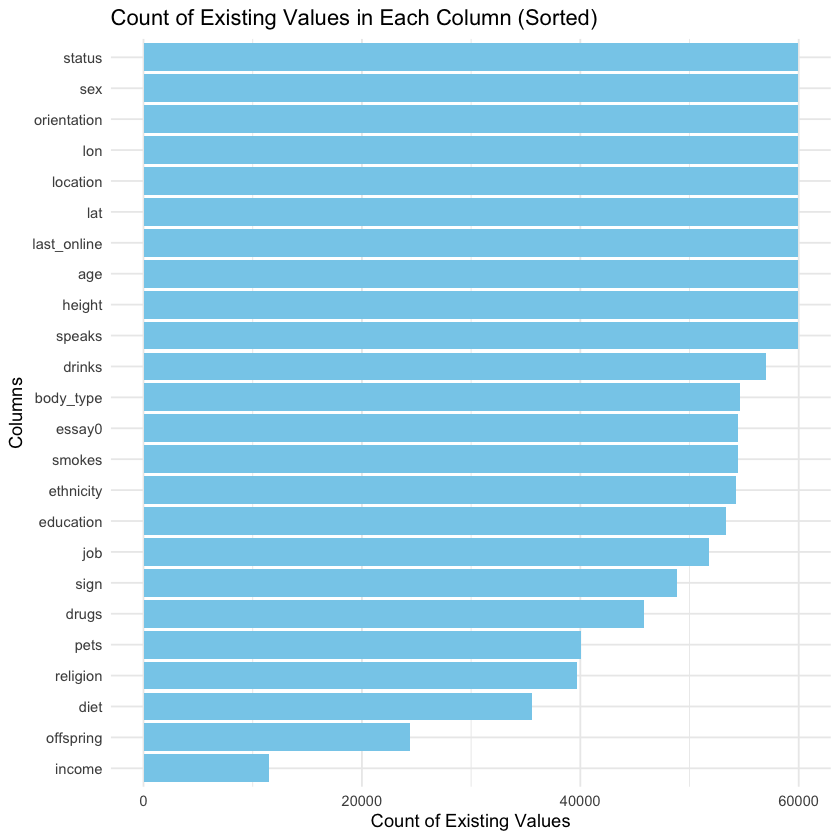

In [12]:
# Sort the data by ExistingValues
missing_data_sorted <- missing_data %>%
  arrange(desc(ExistingValues))

# Create the bar plot
ggplot(missing_data_sorted, aes(x = reorder(Column, ExistingValues), y = ExistingValues)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() + # Flip the coordinates for horizontal bars
  labs(title = "Count of Existing Values in Each Column (Sorted)",
       x = "Columns",
       y = "Count of Existing Values") +
  theme_minimal()

Although having all fields for all records is ideal, this is not our case. However, we still can manage to extract data to create the personas we want. Let's write a couple of functions to explore our categorical data in more detail. The first function, `create_df_with_counts`, reads a given column identifies unique values and them calculates the count and percentage of occurrencies of each value. The second function, `print_df_with_category_count`, prints the results of the previous function.

In [13]:
# Values used in categorical columns

# Function to calculate count and percentage for each unique value,
# handling NA values
create_df_with_counts <- function(column) {

  # Replace NA values with a placeholder ('<NA>')
  column_clean <- ifelse(is.na(column), "<NA>", column)

  # Get unique values including '<NA>' placeholder for NA
  unique_values <- unique(column_clean)

  # Create a dataframe with the unique values and their counts
  df <- data.frame(
    # UniqueValue = unique_values,
    Count = sapply(unique_values, function(x) sum(column_clean == x))
  )

  # Calculate the percentage for each value
  df$Percentage <- (df$Count / length(column)) * 100

  # Return both the dataframe and the number of unique categories
  return(list(df = df, num_categories = length(unique_values)))
}

In [14]:
print_df_with_category_count <- function(df_list, column_name, n = 20, m = 10) {
  cat("Column    : ", column_name, "\n", sep = "")
  cat("Categories: ", df_list$num_categories, "\n", sep = "")
  cat("\n")

  num_categories_df <- data.frame(
    category = rownames(df_list$df),
    num_categories = df_list$df$Count
  )

  # Sort by 'num_categories' in descending order
  num_categories_df <- num_categories_df[order(num_categories_df$num_categories, decreasing = TRUE), ]

  # Group categories if there are more than 'n'
  if (nrow(num_categories_df) > n) {
    # Get the top 'm' categories
    top_categories <- head(num_categories_df, m)

    # Calculate the sum of 'Others'
    other_count <- sum(num_categories_df$num_categories[(m + 1):nrow(num_categories_df)])

    # Create the 'Others' category
    other_category <- data.frame(category = "<All Others>", num_categories = other_count)

    # Combine top categories and 'Others' for both graph and table
    num_categories_df <- rbind(top_categories, other_category) 
    df_list$df <- rbind(df_list$df[1:m, ], colSums(df_list$df[(m+1):nrow(df_list$df), ]))
    rownames(df_list$df)[m+1] <- "<All Others>"
  }

  # Create the bar graph
  p <- ggplot(num_categories_df, aes(x = category, y = num_categories)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    labs(
      title = paste("Number of Categories for", column_name),
      x = column_name,
      y = "Count"
    ) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # Create the table using knitr::kable
  table_html <- knitr::kable(df_list$df, format = "html")

  # Display the table and graph side by side 
  display_html(paste0(
    '<div style="display: flex;">',
    '<div style="flex: 1; padding-right: 10px;">', table_html, '</div>',
    '<div style="flex: 1;">', capture.output(print(p)), '</div>',
    '</div>'
  ))
}

In [67]:
print_df_with_category_count <- function(df_list, column_name, n = 20, m = 10) {
  cat("Column    : ", column_name, "\n", sep = "")
  cat("Categories: ", df_list$num_categories, "\n", sep = "")
  cat("\n")

  # Create a dataframe with category names and counts
  num_categories_df <- data.frame(
    category = rownames(df_list$df),
    num_categories = df_list$df$Count
  )

  # Sort by 'num_categories' in descending order for both graph and table
  num_categories_df <- num_categories_df[order(num_categories_df$num_categories, decreasing = TRUE), ]

  # Update df_list$df to sort the table in the same order
  df_list$df <- df_list$df[order(df_list$df$Count, decreasing = TRUE), ]

  # Group categories if there are more than 'n'
  if (nrow(num_categories_df) > n) {
    # Get the top 'm' categories
    top_categories <- head(num_categories_df, m)

    # Calculate the sum of 'Others'
    other_count <- sum(num_categories_df$num_categories[(m + 1):nrow(num_categories_df)])

    # Create the 'Others' category
    other_category <- data.frame(category = "<All Others>", num_categories = other_count)

    # Combine top categories and 'Others' for both graph and table
    num_categories_df <- rbind(top_categories, other_category)
    
    # Also update df_list$df for the table display, adding "<All Others>"
    df_list$df <- rbind(df_list$df[1:m, ], colSums(df_list$df[(m+1):nrow(df_list$df), ]))
    rownames(df_list$df)[m+1] <- "<All Others>"
  }

  # Create the bar graph sorted by 'num_categories' in descending order
  p <- ggplot(num_categories_df, aes(x = reorder(category, -num_categories), y = num_categories)) +
    geom_bar(stat = "identity", fill = "skyblue") +
    theme_minimal() +
    labs(
      title = paste("Number of Categories for", column_name),
      x = column_name,
      y = "Count"
    ) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # Create the table using knitr::kable
  table_html <- knitr::kable(df_list$df, format = "html")

  # Display the table and graph side by side 
  display_html(paste0(
    '<div style="display: flex;">',
    '<div style="flex: 1; padding-right: 10px;">', table_html, '</div>',
    '<div style="flex: 1;">', capture.output(print(p)), '</div>',
    '</div>'
  ))
}

### body_type

Column    : body_type
Categories: 13



,Count,Percentage
a little extra,2629,4.3856137
average,14652,24.4419978
thin,4711,7.8587395
athletic,11819,19.7160778
fit,12711,21.2040837
<NA>,5296,8.8346178
skinny,1777,2.9643346
curvy,3924,6.5458913
full figured,1009,1.6831815
jacked,421,0.7022987


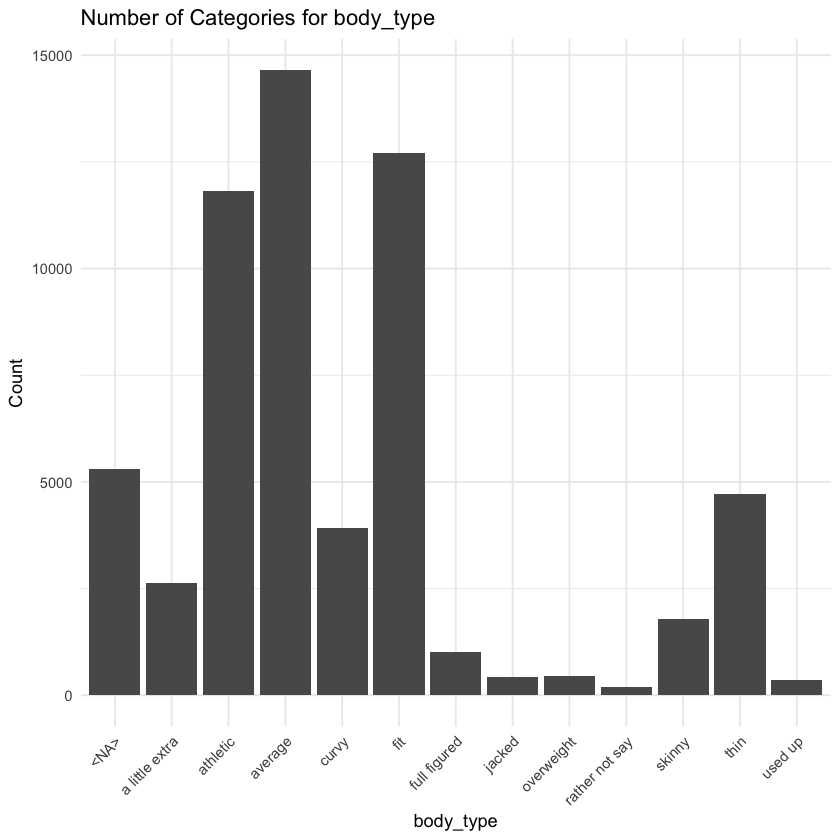

In [15]:
# 'body_type'
df_body_type <- create_df_with_counts(df_eda$body_type)
print_df_with_category_count(df_body_type, 'body_type')

### diet

Column    : diet
Categories: 19



,Count,Percentage
strictly anything,5113,8.5293431
mostly other,1007,1.6798452
anything,6183,10.3142829
vegetarian,667,1.1126681
<NA>,24395,40.6949588
mostly anything,16585,27.6665666
mostly vegetarian,3444,5.7451707
strictly vegan,228,0.3803423
strictly vegetarian,875,1.4596470
mostly vegan,338,0.5638408


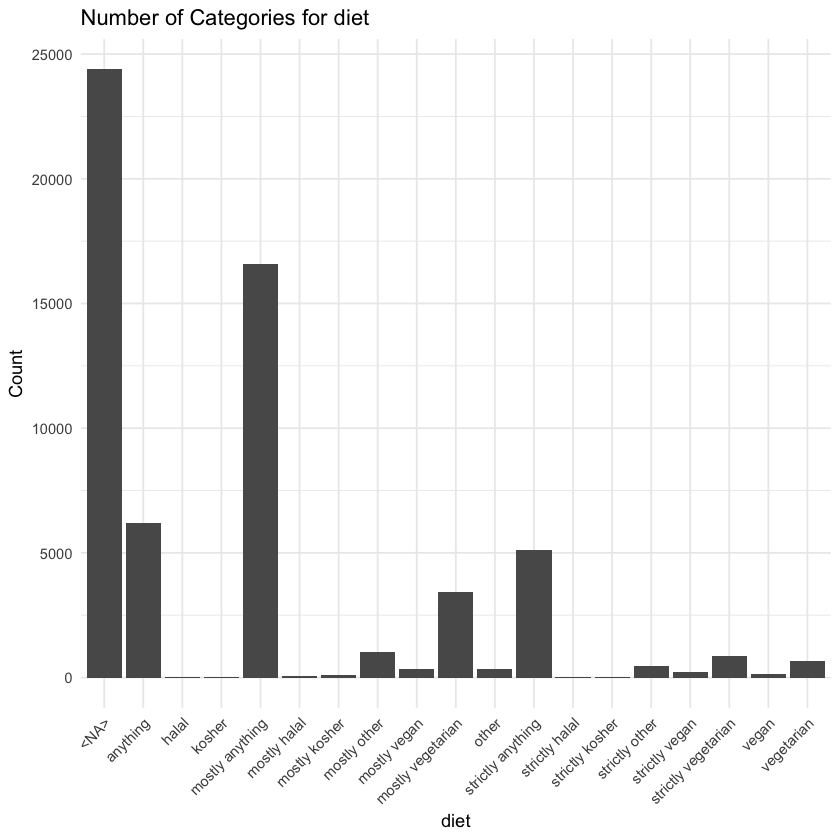

In [16]:
# 'diet'
df_diet <- create_df_with_counts(df_eda$diet)
print_df_with_category_count(df_diet, 'diet')

### drinks

Column    : drinks
Categories: 7



,Count,Percentage
socially,41780,69.6960598
often,5164,8.6144196
not at all,3267,5.4499049
rarely,5957,9.9372769
<NA>,2985,4.9794815
very often,471,0.7857071
desperately,322,0.5371501


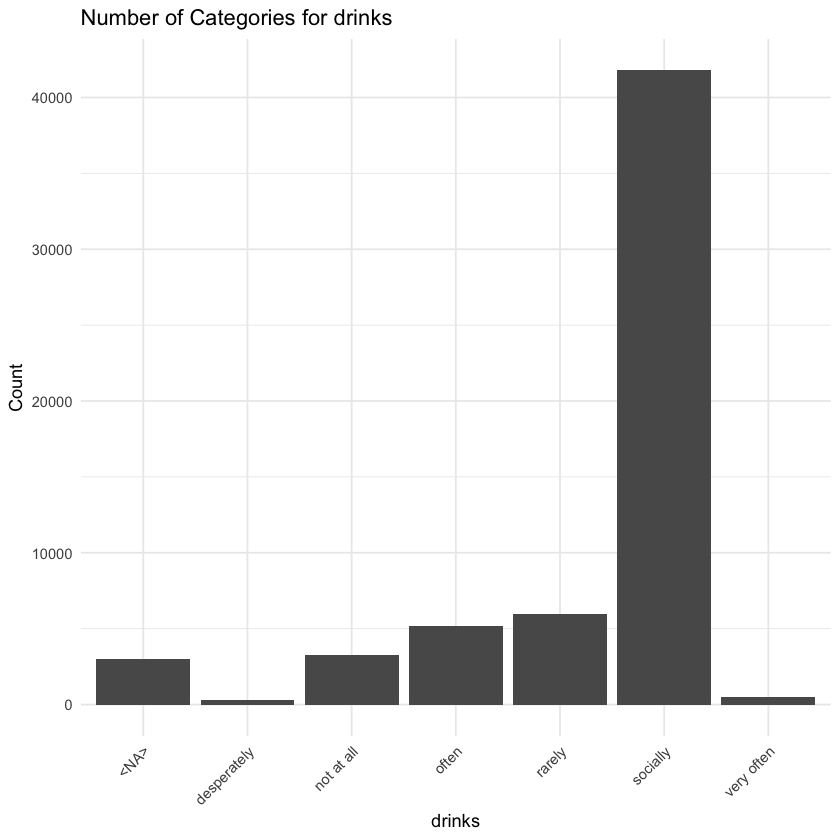

In [17]:
# 'drinks'
df_drinks <- create_df_with_counts(df_eda$drinks)
print_df_with_category_count(df_drinks, 'drinks')

### drugs

Column    : drugs
Categories: 4



,Count,Percentage
never,37724,62.9299703
sometimes,7732,12.8982751
<NA>,14080,23.4878057
often,410,0.6839489


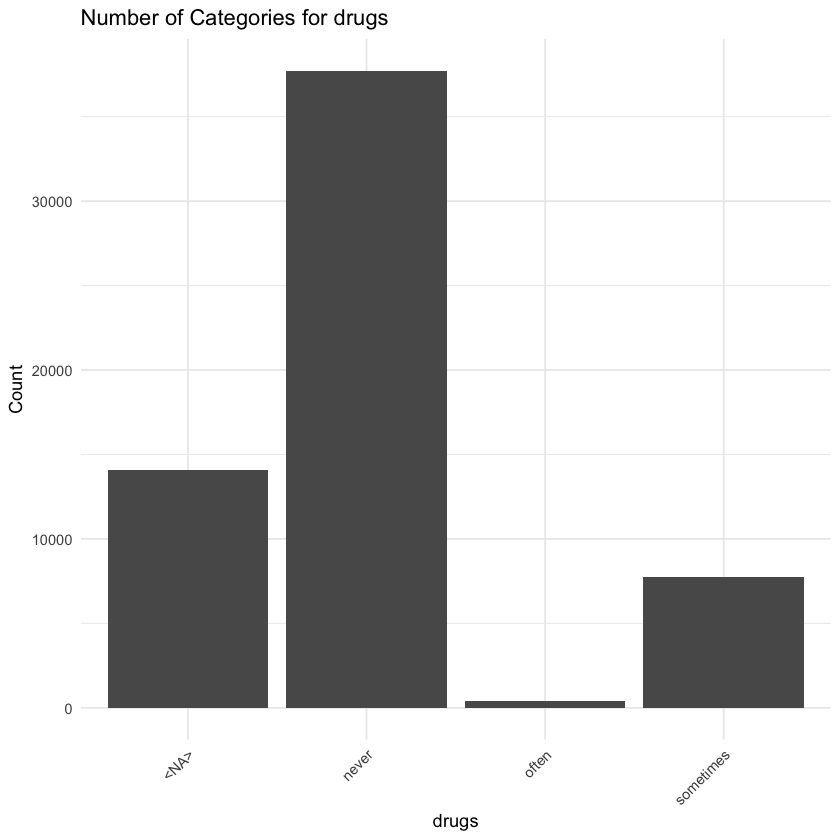

In [18]:
# 'drugs'
df_drugs <- create_df_with_counts(df_eda$drugs)
print_df_with_category_count(df_drugs, 'drugs')

### education

Column    : education
Categories: 33



,Count,Percentage
graduated from college/university,23959,39.9676375
graduated from masters program,8961,14.9484536
<NA>,6628,11.0566176
working on college/university,5712,9.5285757
working on masters program,1683,2.8075268
graduated from two-year college,1531,2.5539652
graduated from high school,1428,2.3821439
graduated from ph.d program,1272,2.1219097
graduated from law school,1122,1.8716845
working on two-year college,1074,1.7916125


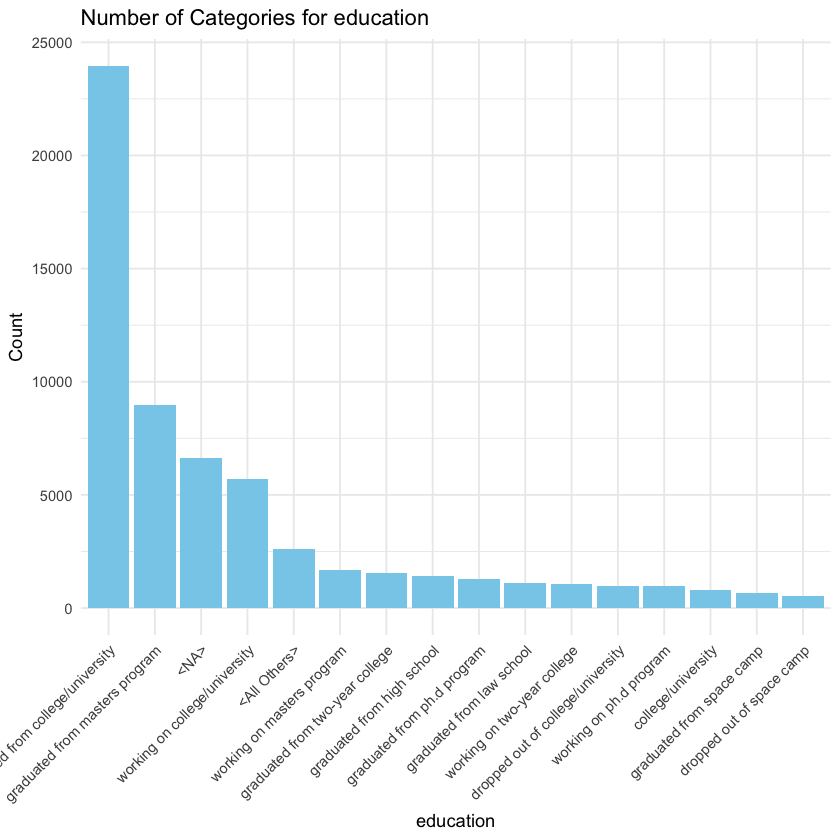

In [68]:
# 'education'
df_education <- create_df_with_counts(df_eda$education)
print_df_with_category_count(df_education, 'education', n = 20, m = 15)

### ethnicity

Column    : ethnicity
Categories: 218



,Count,Percentage
white,32831,54.767624
asian,6134,10.232543
<NA>,5680,9.475194
hispanic / latin,2823,4.709238
black,2008,3.349681
other,1706,2.845895
"hispanic / latin, white",1301,2.170287
indian,1077,1.796617
"asian, white",811,1.352884
"white, other",641,1.069296


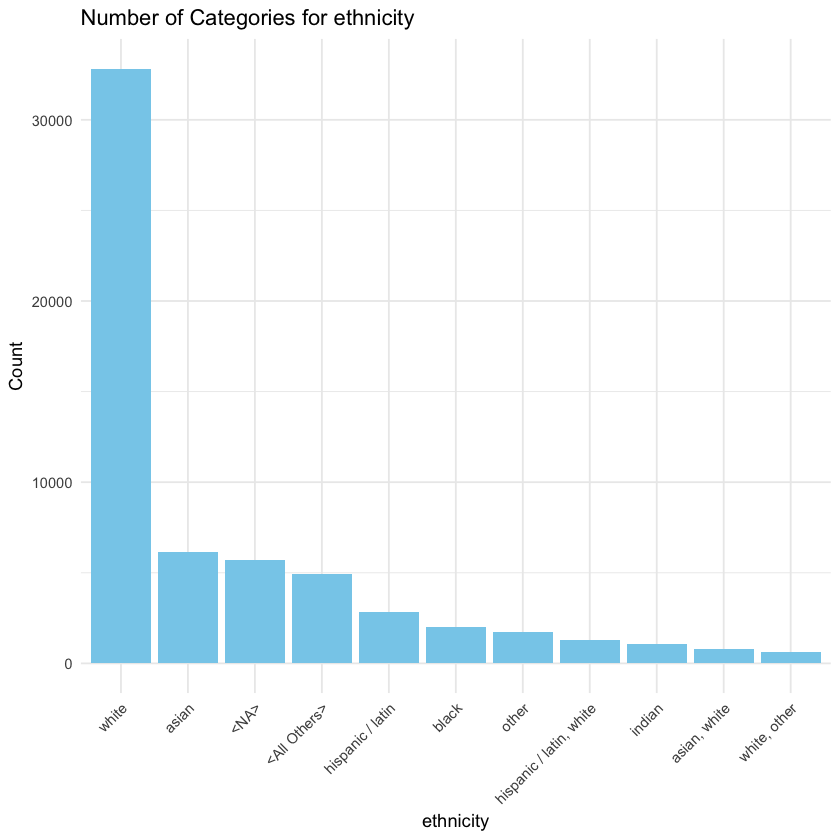

In [69]:
# 'ethnicity'
df_ethnicity <- create_df_with_counts(df_eda$ethnicity)
print_df_with_category_count(df_ethnicity, 'ethnicity')

### job

Column    : job
Categories: 22



,Count,Percentage
<NA>,8198,13.6756414
other,7589,12.6597271
student,4882,8.1439963
science / tech / engineering,4848,8.0872786
computer / hardware / software,4709,7.8554032
artistic / musical / writer,4439,7.4049978
sales / marketing / biz dev,4391,7.3249258
medicine / health,3680,6.1388583
education / academia,3513,5.8602742
executive / management,2373,3.9585627


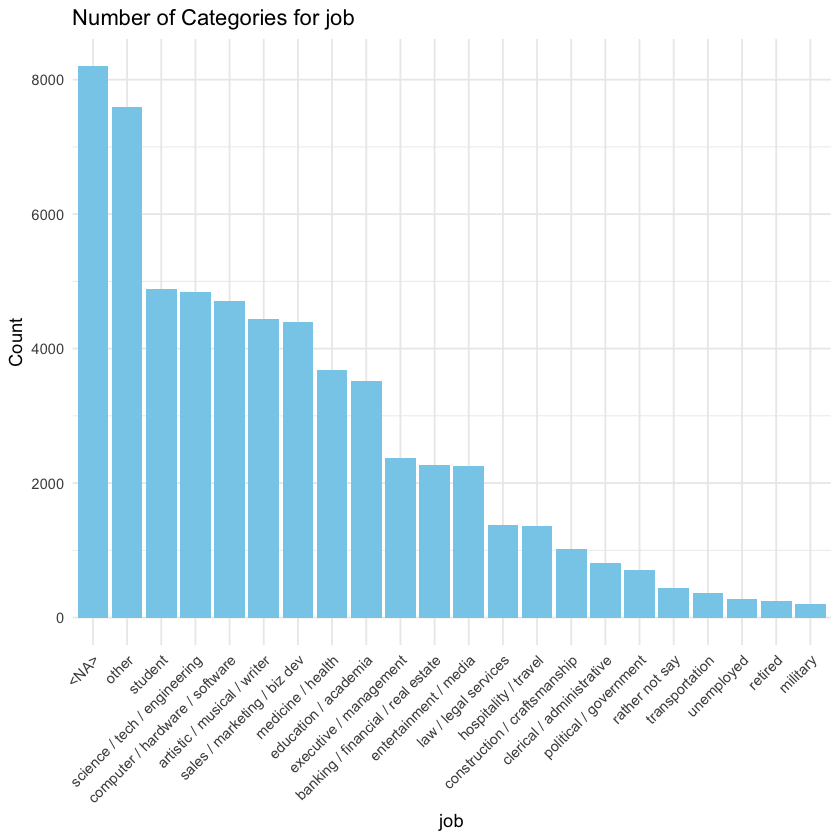

In [70]:
# 'job'
df_job <- create_df_with_counts(df_eda$job)
print_df_with_category_count(df_job, 'job', n = 25)

### location

Column    : location
Categories: 199



,Count,Percentage
"san francisco, california",31064,51.819971
"oakland, california",7214,12.034164
"berkeley, california",4212,7.026324
"san mateo, california",1331,2.220332
"palo alto, california",1064,1.774931
"alameda, california",910,1.518033
"san rafael, california",755,1.259467
"hayward, california",747,1.246122
"emeryville, california",738,1.231108
"redwood city, california",693,1.156040


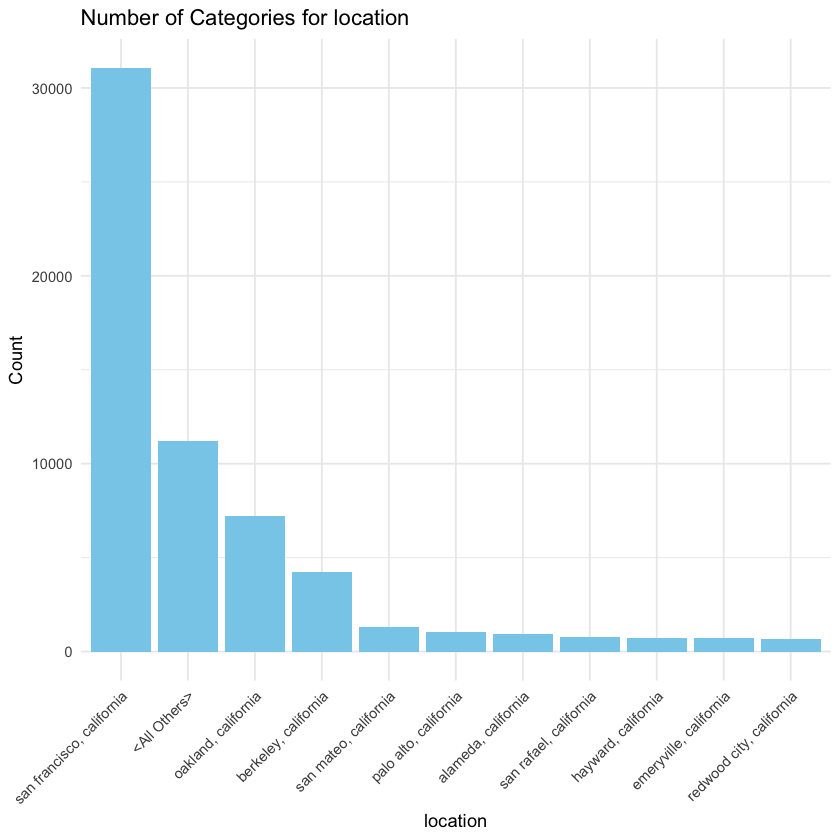

In [71]:
# 'location'
df_location <- create_df_with_counts(df_eda$location)
print_df_with_category_count(df_location, 'location')

### offspring

Column    : offspring
Categories: 16



,Count,Percentage
<NA>,35561,59.3217229
doesn't have kids,7560,12.6113502
"doesn't have kids, but might want them",3875,6.4641511
"doesn't have kids, but wants them",3565,5.9470190
doesn't want kids,2927,4.8827278
has kids,1883,3.1411604
has a kid,1881,3.1378240
"doesn't have kids, and doesn't want any",1132,1.8883662
"has kids, but doesn't want more",442,0.7373303
"has a kid, but doesn't want more",275,0.4587462


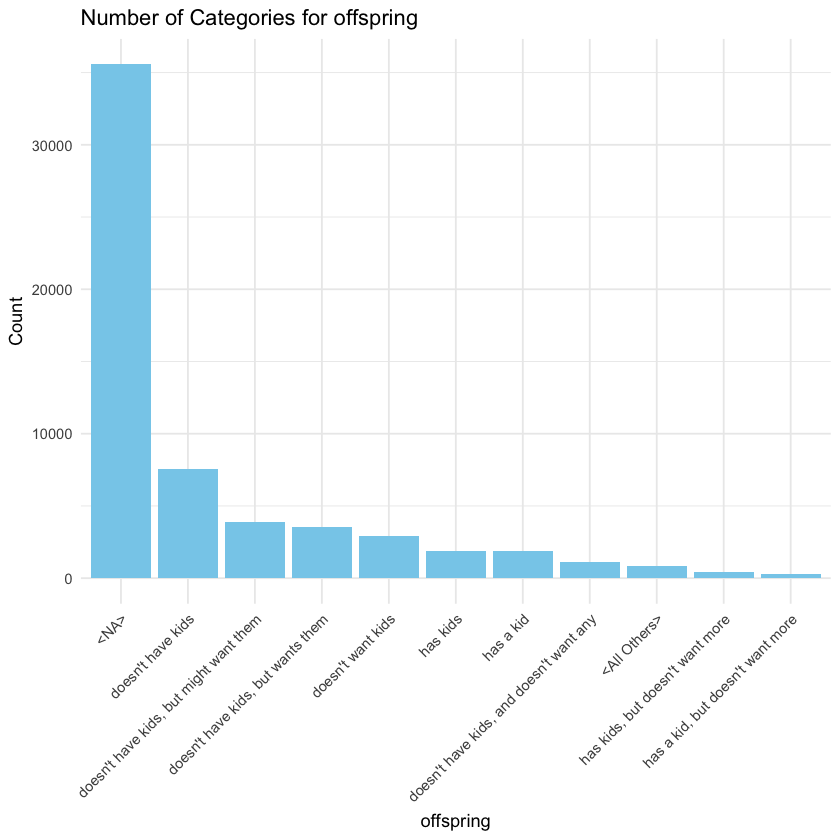

In [77]:
# 'offspring'
df_offspring <- create_df_with_counts(df_eda$offspring)
print_df_with_category_count(df_offspring, 'offspring', n = 10)

### orientation

Column    : orientation
Categories: 3



,Count,Percentage
straight,51606,86.087479
bisexual,2767,4.615821
gay,5573,9.296700


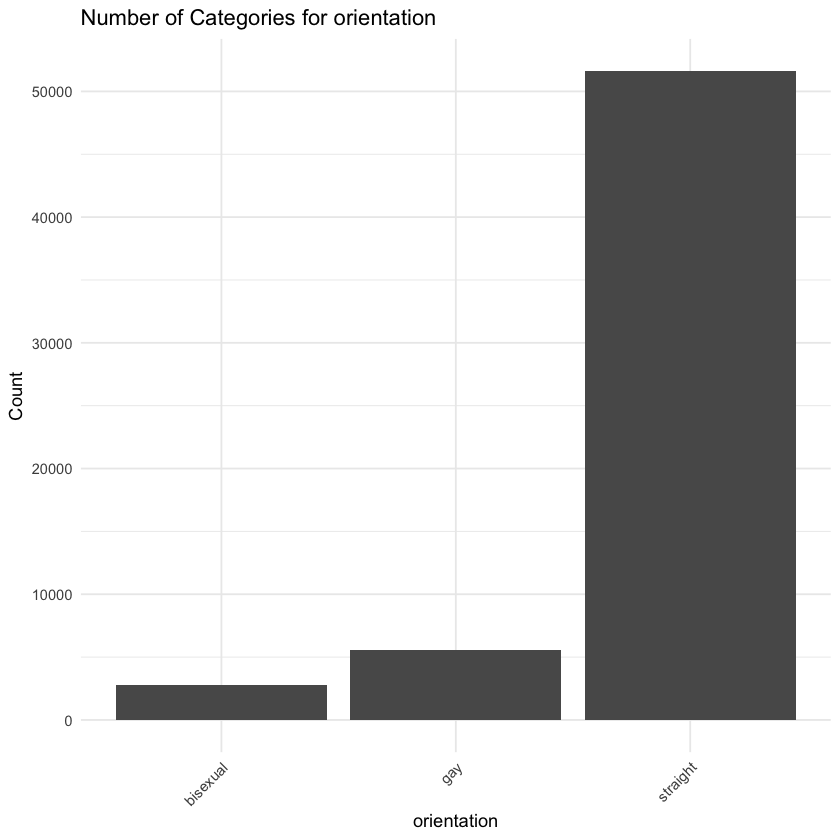

In [24]:
# 'orientation'
df_orientation <- create_df_with_counts(df_eda$orientation)
print_df_with_category_count(df_orientation, 'orientation')

In [56]:
##### Example 2 way EDA
table(df_eda$age, df_eda$orientation)

     
      bisexual  gay straight
  18        49   28      232
  19        72   66      473
  20       109  107      737
  21       132  149     1001
  22       160  212     1562
  23       190  254     2148
  24       177  304     2761
  25       183  325     3023
  26       175  352     3197
  27       163  303     3219
  28       145  353     3085
  29       135  271     2889
  30       113  300     2736
  31        90  248     2397
  32       127  199     2261
  33        75  177     1954
  34        64  163     1675
  35        79  135     1541
  36        59  131     1393
  37        65  142     1220
  38        55  103     1172
  39        45   87     1040
  40        27   95      908
  41        21  105      854
  42        42  100      930
  43        27   92      739
  44        26   87      595
  45        18   70      555
  46        17   73      488
  47        21   79      429
  48        13   53      415
  49        14   60      385
  50        14   56      367
  51    

### pets

Column    : pets
Categories: 16



,Count,Percentage
likes dogs and likes cats,14814,24.7122410
has cats,1406,2.3454442
likes cats,1063,1.7732626
<NA>,19921,33.2315751
has dogs and likes cats,2333,3.8918360
likes dogs and has cats,4313,7.1948087
likes dogs and dislikes cats,2029,3.3847129
has dogs,4134,6.8962066
has dogs and dislikes cats,552,0.9208287
likes dogs,7224,12.0508458


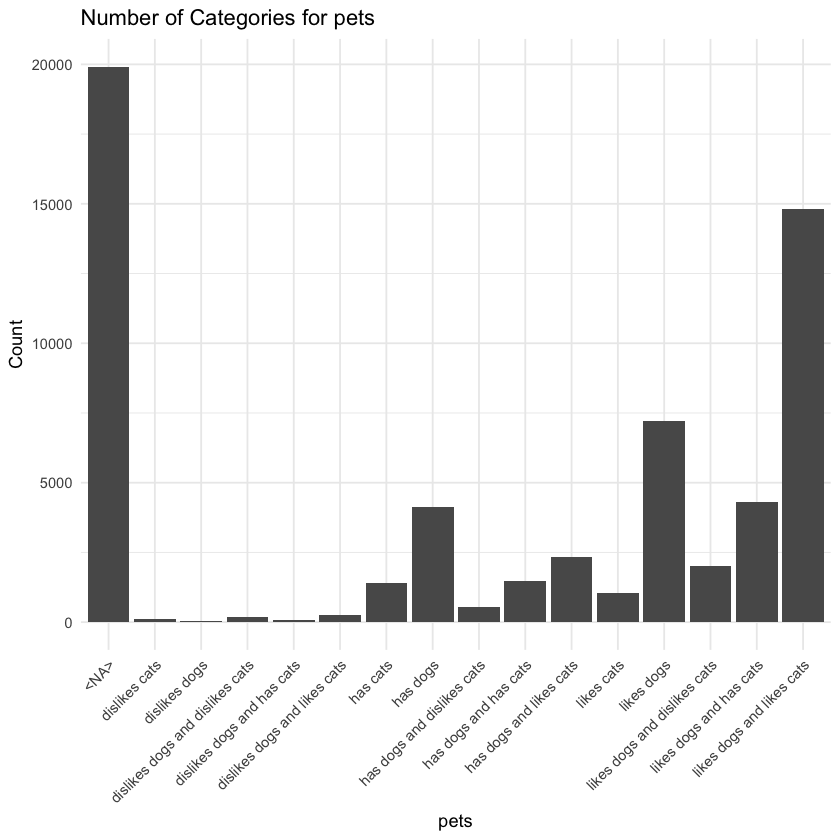

In [29]:
# 'pets'
df_pets <- create_df_with_counts(df_eda$pets)
print_df_with_category_count(df_pets, 'pets')

#### Pet lovers

Let's add two columns to clearly identify dogs and cats lovers. The columns will be named `dog_friendly` and `cat_friendly`. Each column will have TRUE if the user likes or has that pet, otherwise it will be FALSE.

In [34]:
# 1. Add the 'dog_friendly' and 'cat_friendly' columns with default values of FALSE
df_eda$dog_friendly <- FALSE
df_eda$cat_friendly <- FALSE

# 2. Function to check pet preferences and assign TRUE to the respective columns only if "has" or "likes" is present
df_eda <- df_eda %>%
  mutate(
    # For dog_friendly: Ensure "dislikes dogs" is NOT present, and check for "has dogs" or "likes dogs"
    dog_friendly = ifelse(grepl("has dogs|likes dogs", pets, ignore.case = TRUE) &
                          !grepl("dislikes dogs", pets, ignore.case = TRUE), TRUE, FALSE),
    
    # For cat_friendly: Ensure "dislikes cats" is NOT present, and check for "has cats" or "likes cats"
    cat_friendly = ifelse(grepl("has cats|likes cats", pets, ignore.case = TRUE) &
                          !grepl("dislikes cats", pets, ignore.case = TRUE), TRUE, FALSE)
  )

In [35]:
# 3. Display a random sample of 10 records showing 'pets', 'dog_friendly', and 'cat_friendly' columns
set.seed(123)  # Set seed for reproducibility
sample_records <- df_eda %>%
  select(pets, dog_friendly, cat_friendly) %>%
  sample_n(10)

# Print the sample records
print(sample_records)

                           pets dog_friendly cat_friendly
1                    likes dogs         TRUE        FALSE
2                          <NA>        FALSE        FALSE
3  dislikes dogs and likes cats        FALSE         TRUE
4  likes dogs and dislikes cats         TRUE        FALSE
5                          <NA>        FALSE        FALSE
6                          <NA>        FALSE        FALSE
7       likes dogs and has cats         TRUE         TRUE
8                          <NA>        FALSE        FALSE
9     likes dogs and likes cats         TRUE         TRUE
10                     has dogs         TRUE        FALSE


### religion

Column    : religion
Categories: 46



,Count,Percentage
<NA>,20226,33.740366
agnosticism,2724,4.544090
other,2691,4.489040
agnosticism but not too serious about it,2636,4.397291
agnosticism and laughing about it,2496,4.163747
catholicism but not too serious about it,2318,3.866814
atheism,2175,3.628265
other and laughing about it,2119,3.534848
atheism and laughing about it,2074,3.459780
christianity,1957,3.264605


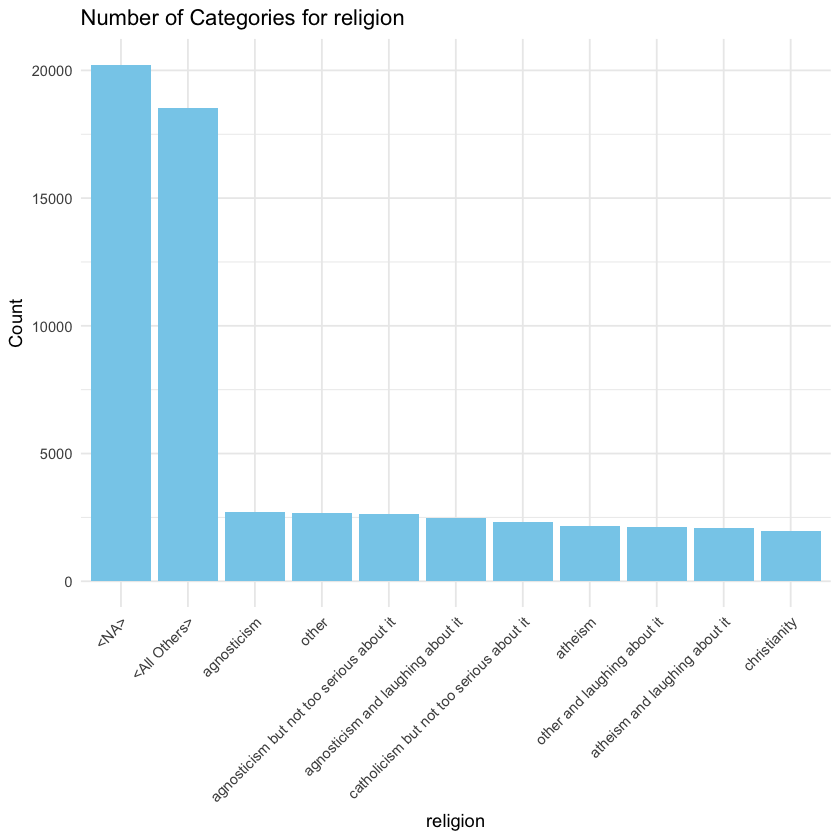

In [78]:
# 'religion'
df_religion <- create_df_with_counts(df_eda$religion)
print_df_with_category_count(df_religion, 'religion', n = 10, m = 10)

### sex

Column    : sex
Categories: 2



,Count,Percentage
m,35829,59.76879
f,24117,40.23121


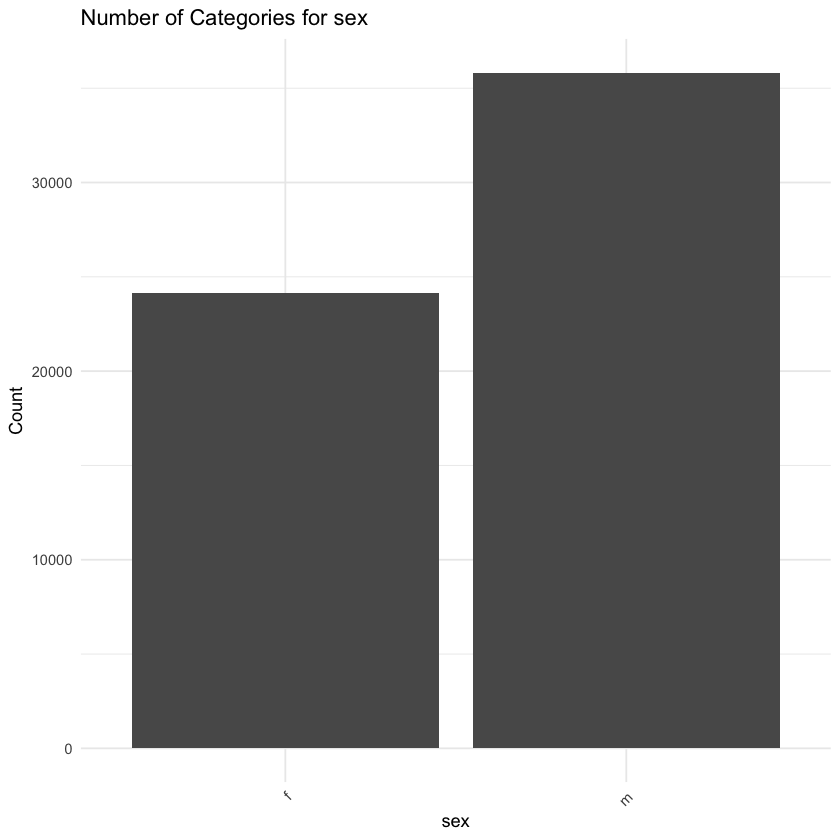

In [27]:
# 'sex'
df_sex <- create_df_with_counts(df_eda$sex)
print_df_with_category_count(df_sex, 'sex')

### sign

Column    : sign
Categories: 49



,Count,Percentage
<NA>,11056,18.443266
gemini and it's fun to think about,1782,2.972675
scorpio and it's fun to think about,1772,2.955994
leo and it's fun to think about,1692,2.822540
libra and it's fun to think about,1649,2.750809
taurus and it's fun to think about,1640,2.735796
cancer and it's fun to think about,1597,2.664064
pisces and it's fun to think about,1592,2.655724
sagittarius and it's fun to think about,1583,2.640710
virgo and it's fun to think about,1574,2.625697


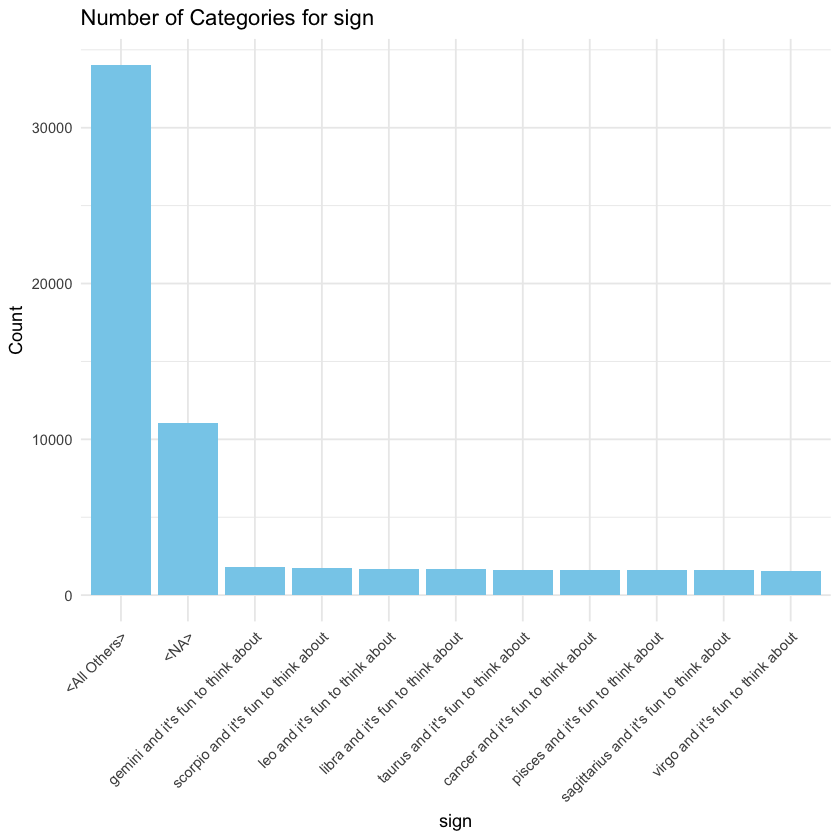

In [79]:
# 'sign'
df_sign <- create_df_with_counts(df_eda$sign)
print_df_with_category_count(df_sign, 'sign')

### smokes

Column    : smokes
Categories: 6



,Count,Percentage
sometimes,3787,6.317352
no,43896,73.225903
<NA>,5512,9.194942
when drinking,3040,5.071231
yes,2231,3.721683
trying to quit,1480,2.468889


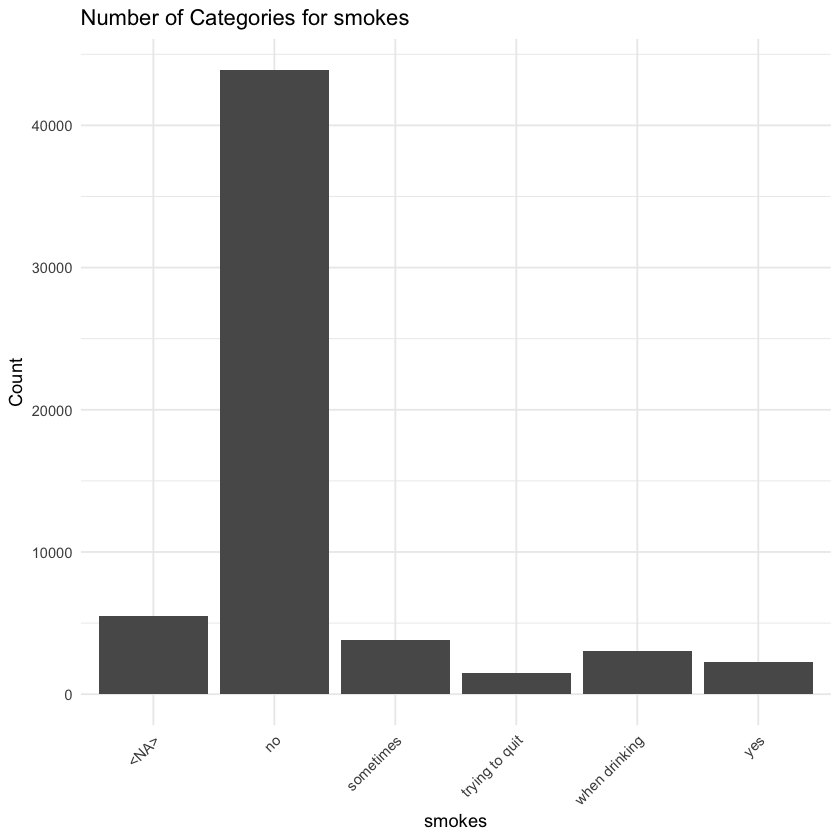

In [29]:
# 'smokes'
df_smokes <- create_df_with_counts(df_eda$smokes)
print_df_with_category_count(df_smokes, 'smokes')

### speaks

Column    : speaks
Categories: 7648



,Count,Percentage
english,21828,36.4127715
english (fluently),6628,11.0566176
"english (fluently), spanish (poorly)",2059,3.4347579
"english (fluently), spanish (okay)",1917,3.1978781
"english (fluently), spanish (fluently)",1288,2.1486004
"english, spanish",859,1.4329563
"english (fluently), french (poorly)",756,1.2611350
"english, spanish (okay)",655,1.0926501
"english, spanish (poorly)",609,1.0159143
"english (fluently), chinese (fluently)",535,0.8924699


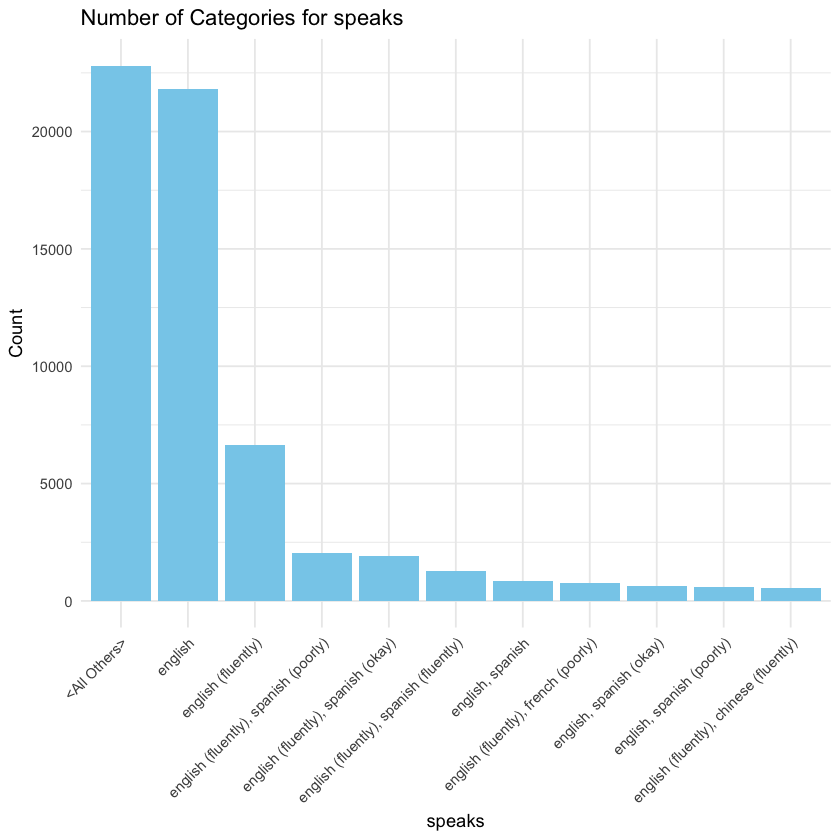

In [80]:
# 'speaks'
df_speaks <- create_df_with_counts(df_eda$speaks)
print_df_with_category_count(df_speaks, 'speaks', n = 10)

`speaks` column has lists of languages spoken by each user followed (in some cases) by the expertise level. More than that, in some cases the language appears more than once for the same user, sometimes with the same level of expertise and sometimes different. The large number of languages and the possibility to combine n languages for user plus duplicates and four different levels of expertise, brings this column to have 7648 unique combinations, which is useless in our research. 

To know how many people speak a language, let's create a single column where each cell has only one language with no level of expertise. This is a complex cleaning process that we will solve in steps. In the first step, we will remove duplicate `language(level of expertise)` occurrencies leaving the highest level of expertise. This could be useful if we want to do additional analysis later with that information. The `process_speaks` function below does that.

In [31]:
# Define the order of fluency levels
fluency_levels <- c(NA, "(poorly)", "(okay)", "(fluently)")


# Function to process the 'speaks' column
process_speaks <- function(speaks) {

  # print(paste("0 - speaks: ", speaks, sep = "")) ### STEP 0

  if (is.na(speaks) || speaks == "") {
    # return("english")
    return("")
  }

  # print(paste("1 - speaks: ", speaks, sep = "")) ### STEP 1

  # Split the speaks column by comma
  languages <- unlist(strsplit(speaks, ","))

  # print(paste("2 - languages: ", languages, sep = "")) ### STEP 2

  # Remove leading and trailing whitespace and any extra spaces
  languages <- str_trim(languages)
  languages <- gsub("\\s+", "", languages)

  # print(paste("3 - languages: ", languages, sep = "")) ### STEP 3

  # Create a data frame of languages and levels
  languages_df <- data.frame(language = str_extract(languages, "^[^()]+"),
                             level = str_extract(languages, "\\(([^)]+)\\)"))

  # print(paste("4 - languages_df: ", languages_df, sep = "")) ### STEP 4
  # kable(languages_df, caption = 'STEP 4')

  # Ensure 'english' is included with no level if not already present
  if (!any(grepl("^english", tolower(languages_df$language)))) {
    languages_df <- rbind(languages_df, data.frame(language = "english", level = NA))
  }

  # print(paste("5 - languages_df: ", languages_df, sep = "")) ### STEP 5
  # kable(languages_df, caption = 'STEP 5')

  # Remove duplicates and keep the highest level, handle NA levels correctly
  cleaned_languages_df <- languages_df %>%
    mutate(level = factor(level, levels = fluency_levels, ordered = TRUE)) %>%
    group_by(language) %>%
    filter(if(all(is.na(level))) TRUE else level == max(level, na.rm = TRUE)) %>%
    distinct(language, .keep_all = TRUE) %>%  # Remove duplicates after filtering
    ungroup()  # Ungroup the dataframe

  # Print the cleaned dataframe
  # print(paste("6 - languages_df: ", cleaned_languages_df, sep = "")) ### STEP 6
  # kable(cleaned_languages_df, caption = 'STEP 6')

  # Combine languages and levels back into a single string
  languages <- paste(cleaned_languages_df$language, ifelse(is.na(cleaned_languages_df$level), "", paste0(cleaned_languages_df$level)), sep = "", collapse = ", ")

  # print(paste("7 - languages: ", languages, sep = "")) ### STEP 7

  return(languages)
}

The cleaned result will be stored in `df_eda_processed`.

In [32]:
# Create a new dataset to avoid overwriting the original 'df_eda' dataset
df_eda_processed <- df_eda 
df_eda_processed$speaks <- sapply(df_eda_processed$speaks, process_speaks)

These results do not help enough because we still have too many combinations, as shown below.

Column    : speaks
Categories: 7500



,Count,Percentage
english,21913,36.5545658
"english(fluently), spanish(poorly), french(poorly)",93,0.1551396
"english, french, c++",4,0.0066727
"english, german(poorly)",82,0.1367898
"english(fluently), chinese(okay)",432,0.7206486
"english, spanish(okay)",655,1.0926501
english(fluently),6754,11.2668068
"english(fluently), signlanguage(poorly)",78,0.1301171
"english(fluently), spanish(okay)",1929,3.2178961
"english(fluently), c++(fluently), german(poorly), french(poorly)",1,0.0016682


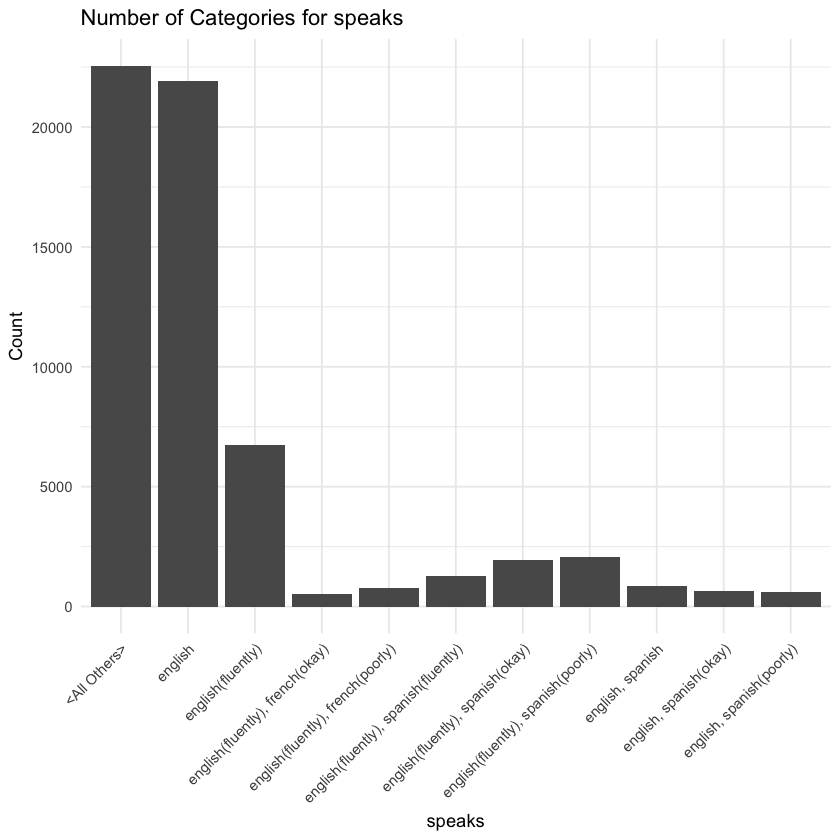

In [33]:
df_speaks_cleaned <- create_df_with_counts(df_eda_processed$speaks)
print_df_with_category_count(df_speaks_cleaned, 'speaks')

Let's reorganize our speak data to ease the analysis. At this point, we will decompose each list of languages in as many rows as languages it has, leaving only one language per row.

In [34]:
# Function to process the column with multiple values
process_column_to_vertical_df <- function(data_column) {
  # Step 1: Split each entry by commas, separating the languages
  separated <- str_split(data_column, ",")
  
  # Step 2: Remove the level of expertise (anything inside parentheses)
  cleaned <- lapply(separated, function(x) {
    str_trim(gsub("\\(.*?\\)", "", x))  # Removes text within parentheses and trims whitespace
  })
  
  # Step 3: Unlist the cleaned languages and convert them into a dataframe
  df_vertical <- data.frame(Language = unlist(cleaned))
  
  # Step 4: Return the vertical dataframe with unique values
  return(df_vertical)
}

# Read the languages data
languages_column <- df_eda_processed$speaks 

# Apply the function
df_languages <- process_column_to_vertical_df(languages_column)

# Print a sample of the resulting vertical dataframe
head(df_languages)

,Language
,<chr>
1,english
2,english
3,spanish
4,french
5,english
6,french


This is the number of rows we got after unfolding the languages.

In [35]:
nrow(df_languages)

[1] 110413

Now, let's count the ocurrencies of each language.

In [36]:
# Function to count occurrences, return top n values, calculate percentages, and plot a graph
count_occurrences <- function(input_list, df_eda, n = NULL) {

  # Step 1: Use the table() function to count the occurrences of each unique value
  counts <- table(input_list)
  
  # Step 2: Convert the table into a dataframe
  df_counts <- as.data.frame(counts, stringsAsFactors = FALSE)
  
  # Step 3: Rename the columns to 'Value' and 'Count'
  colnames(df_counts) <- c("Value", "Count")
  
  # Step 4: Calculate the percentage for each value against the total number of rows in df_eda
  total_rows <- nrow(df_eda)
  df_counts$Percentage <- (df_counts$Count / total_rows) * 100
  
  # Step 5: Sort the dataframe by 'Count' in descending order
  df_counts <- df_counts[order(-df_counts$Count), ]
  
  # Step 6: If n is specified, return only the top n rows
  if (!is.null(n)) {
    df_counts <- head(df_counts, n)
  }
  
  # Step 7: Create the bar plot
  p <- ggplot(df_counts, aes(x = reorder(Value, -Count), y = Count)) +
    geom_bar(stat = "identity", fill = "skyblue") +
    theme_minimal() +
    labs(title = "Occurrences of Values", x = "Values", y = "Count") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels
  
  # Step 8: Explicitly print the plot to display it
  print(p)
  
  # Step 9: Return the dataframe
  return(df_counts)
}

The table below lists the top 10 languages with more speakers.

,Value,Count,Percentage
,<chr>,<int>,<dbl>
21,english,59896,99.916592
66,spanish,16312,27.211157
26,french,7851,13.096787
16,chinese,3660,6.105495
29,german,3083,5.142962
41,japanese,2188,3.649952
40,italian,2181,3.638274
12,c++,1769,2.950989
59,russian,1282,2.138591


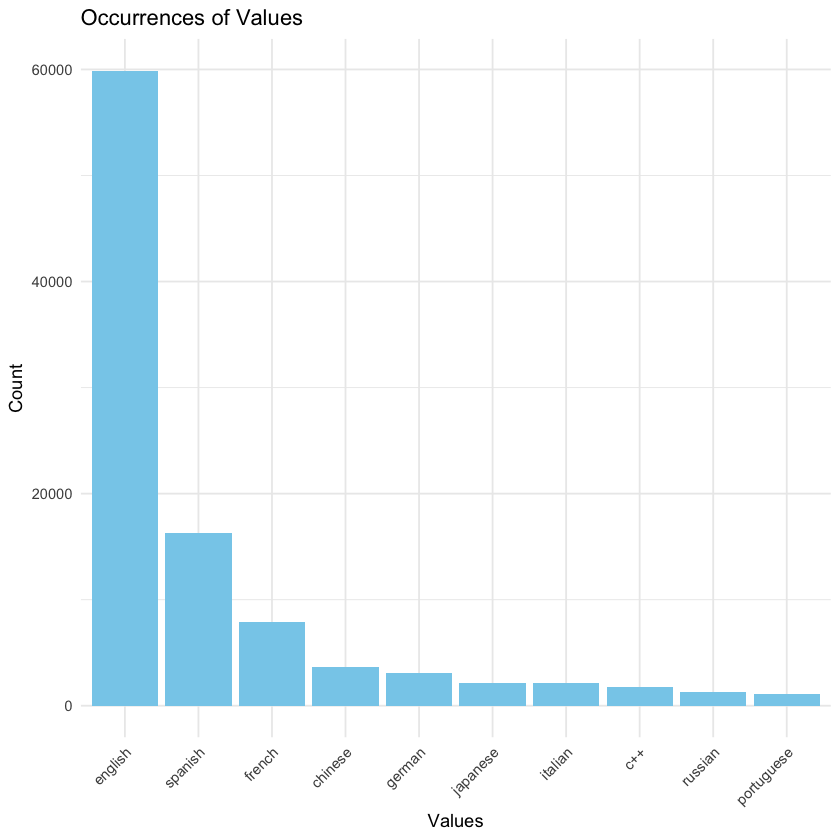

In [37]:
# Apply the function to count occurrences and return the top 3 values
df_languages_results <- count_occurrences(df_languages, df_eda, n = 10)

# Print the resulting dataframe with top 3 values
df_languages_results

### status

Let's generate the table and the graph for the status column as we did before.

Column    : status
Categories: 5



,Count,Percentage
single,55697,92.9119541
available,1865,3.1111334
seeing someone,2064,3.4430988
married,310,0.5171321
unknown,10,0.0166817


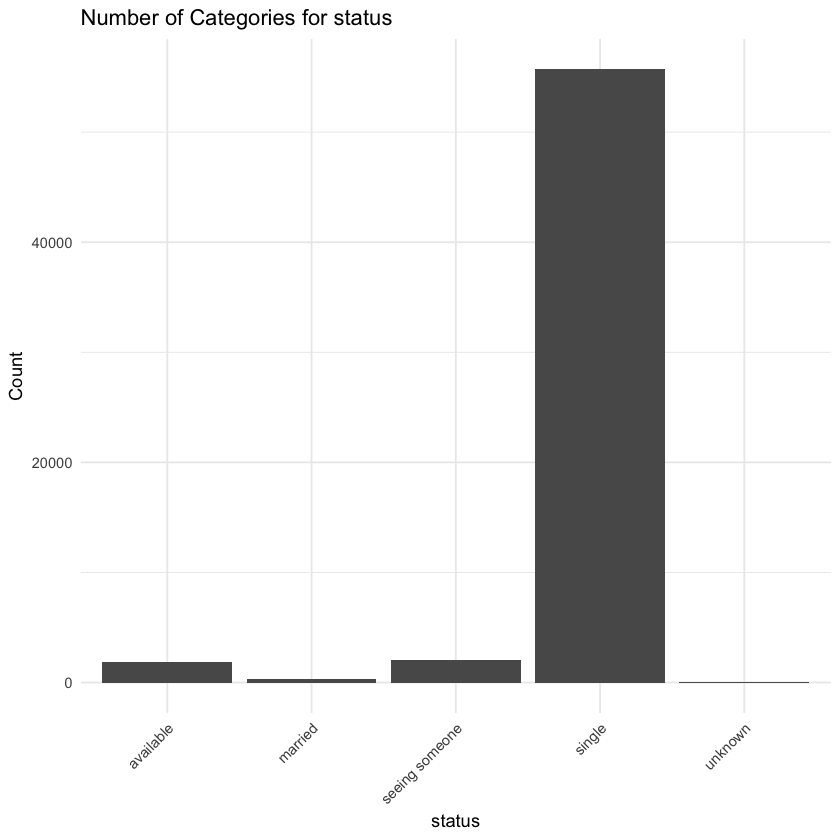

In [38]:
# 'status'
df_status <- create_df_with_counts(df_eda$status)
print_df_with_category_count(df_status, 'status')

After understanding better the contents of each categorical column, this time to analyze numerical columns. Let's look for outliers and the distribution of our data.

### age

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   26.00   30.00   32.34   37.00  110.00 

Number of invalid age records:  2 
Percentage of invalid age records:  0.003336336 %


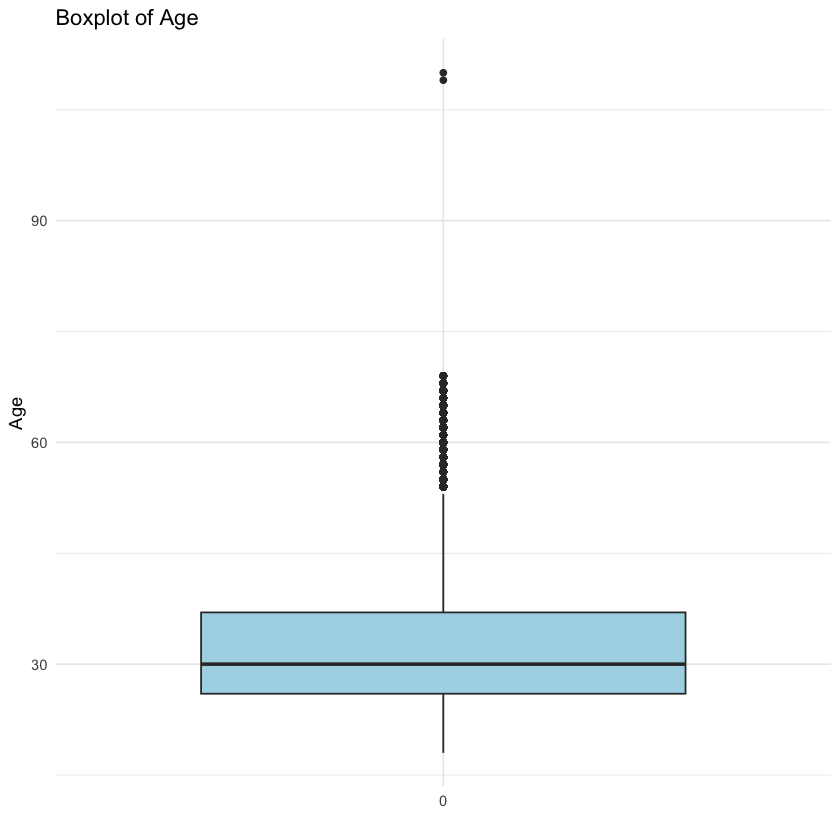

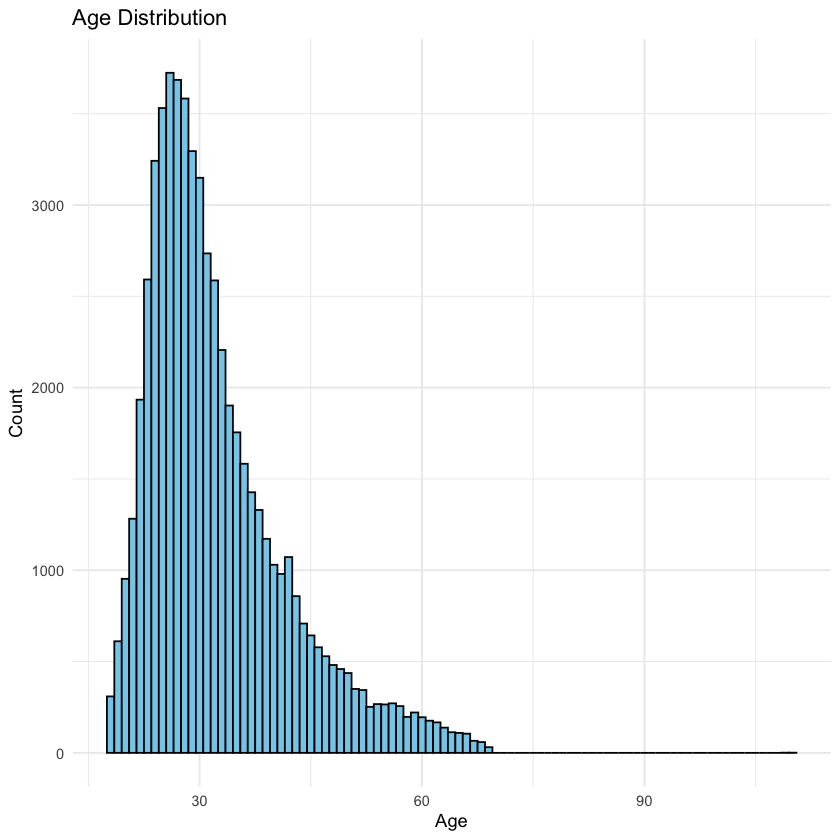

In [39]:
# Let's start with analyzing the 'age' column

# Summary of age column
summary(df_eda$age)

# Check how many records have unrealistic values (age < 18 or age > 100)
invalid_age <- df_eda %>%
  filter(age < 18 | age > 100)

# Calculate percentage of invalid age records
invalid_age_count <- nrow(invalid_age)
invalid_age_percentage <- (invalid_age_count / nrow(df_eda)) * 100

cat("Number of invalid age records: ", invalid_age_count, "\n")
cat("Percentage of invalid age records: ", invalid_age_percentage, "%\n")

# Visualize age data with a boxplot to identify outliers
ggplot(df_eda, aes(x = factor(0), y = age)) +
  geom_boxplot(fill = "lightblue") +
  theme_minimal() +
  labs(title = "Boxplot of Age", x = "", y = "Age")

# Plot age distribution with a histogram
ggplot(df_eda, aes(x = age)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  theme_minimal() +
  labs(title = "Age Distribution", x = "Age", y = "Count")

Let's see what data are in the records with the age outliers.

In [48]:
# Filter and print records where age > 90
df_eda_over_90 <- df_eda %>% filter(age > 90)

# Print the resulting dataframe
print(df_eda_over_90)

  age body_type         diet drinks drugs                  education ethnicity
1 110      <NA>         <NA>   <NA>  <NA>                       <NA>      <NA>
2 109  athletic mostly other   <NA> never working on masters program      <NA>
  height income     job last_online                  location       offspring
1     67     NA    <NA>  2012-06-27     daly city, california            <NA>
2     95     NA student  2012-06-30 san francisco, california might want kids
  orientation pets                            religion sex
1    straight <NA>                                <NA>   f
2    straight <NA> other and somewhat serious about it   m
                            sign        smokes         speaks    status essay0
1                           <NA>          <NA>        english    single   <NA>
2 aquarius but it doesn't matter when drinking english (okay) available   <NA>
       lat       lon
1 37.69109 -122.4728
2 37.77712 -122.4196


As we can see above, the first record has little data, meaning that it could be discarded. The second record has better data, which means that, under certain conditions, we could consider removing the age value and keep all other fields. For this analysis we will remove those records as well as any records with ages less than 18.

In [37]:
# Filter out records where age > 90 or age < 18
df_eda_clean <- df_eda %>% filter(age <= 90 & age >= 18)

# Print the record count of df_eda_clean
cat("Number of records in df_eda_clean: ", nrow(df_eda_clean), "\n")

Number of records in df_eda_clean:  59944 


### height

As before, let's look for outliers and check the distribution.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0    66.0    68.0    68.3    71.0    95.0       3 

Number of invalid height records:  27 
Percentage of invalid height records:  0.04504054 %


Warning message:
"Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


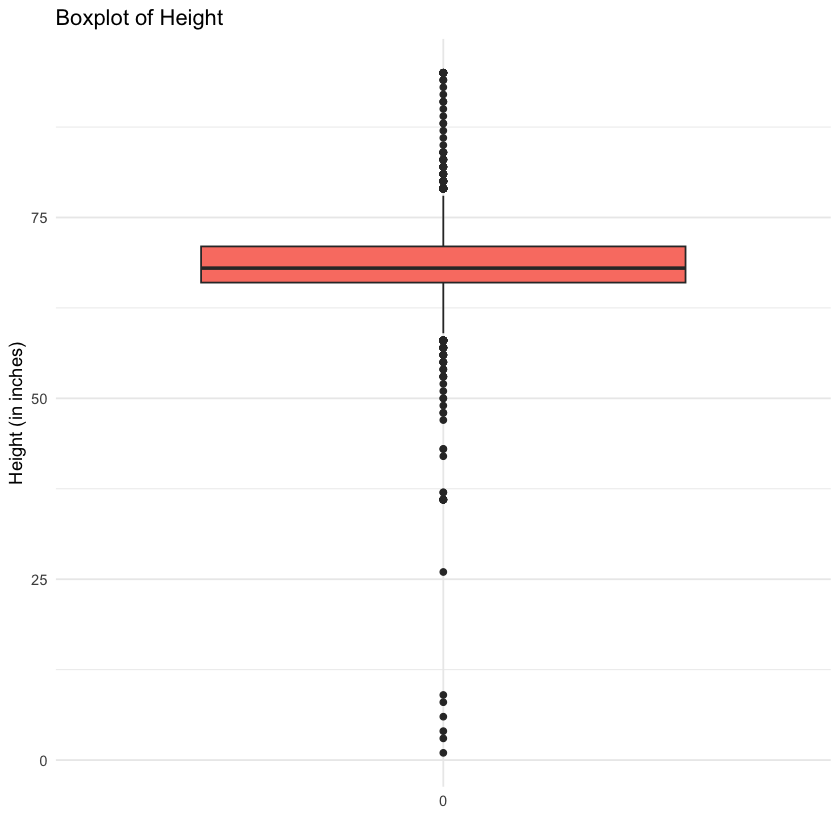

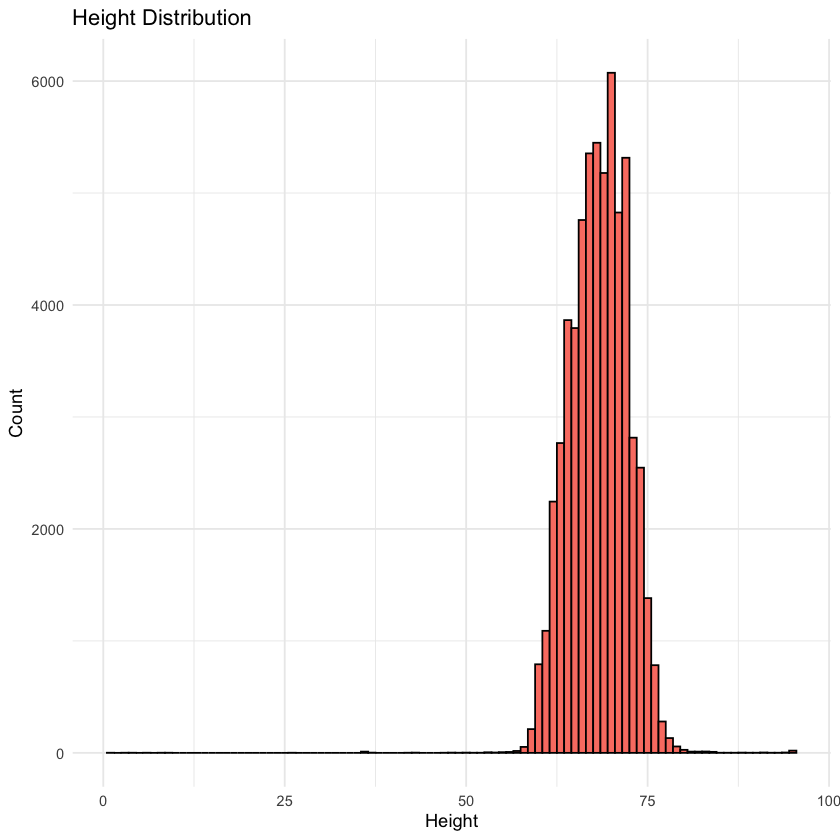

In [40]:
# Analysis of height column

# Summary of height column
summary(df_eda$height)

# Check for invalid height values (less than 50 inches or greater than 95 inches)
invalid_height <- df_eda %>%
  filter(height < 50 | height > 95)

# Calculate percentage of invalid height records
invalid_height_count <- nrow(invalid_height)
invalid_height_percentage <- (invalid_height_count / nrow(df_eda)) * 100

cat("Number of invalid height records: ", invalid_height_count, "\n")
cat("Percentage of invalid height records: ", invalid_height_percentage, "%\n")

# Visualize height data with a boxplot to detect outliers
ggplot(df_eda, aes(x = factor(0), y = height)) +
  geom_boxplot(fill = "salmon") +
  theme_minimal() +
  labs(title = "Boxplot of Height", x = "", y = "Height (in inches)")

# Plot height distribution with a histogram
ggplot(df_eda, aes(x = height)) +
  geom_histogram(binwidth = 1, fill = "salmon", color = "black") +
  theme_minimal() +
  labs(title = "Height Distribution", x = "Height", y = "Count")

Let's identify the outliers. For the purpose of this analysis, we will remove all records with height below 60 inches or over 90.

In [38]:
# Step 1: Filter records in df_eda_clean where height < 60 or height > 90 and remove them
df_eda_clean <- df_eda_clean %>%
  filter(height >= 60 & height <= 90)

# Step 2: Count the number of records in df_eda_clean after removing outliers
final_record_count <- nrow(df_eda_clean)

# Step 3: Print the number of records in df_eda_clean after filtering
cat("Number of records in df_eda_clean after removing height outliers: ", final_record_count, "\n")

Number of records in df_eda_clean after removing height outliers:  59579 


### income

Income seems to have potential to identify our personas. Let's see what we can find.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  20000   20000   50000  104395  100000 1000000   48442 

Number of invalid income records:  0 
Percentage of invalid income records:  0 %


Warning message:
"Removed 48442 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 48442 rows containing non-finite outside the scale range
(`stat_bin()`)."


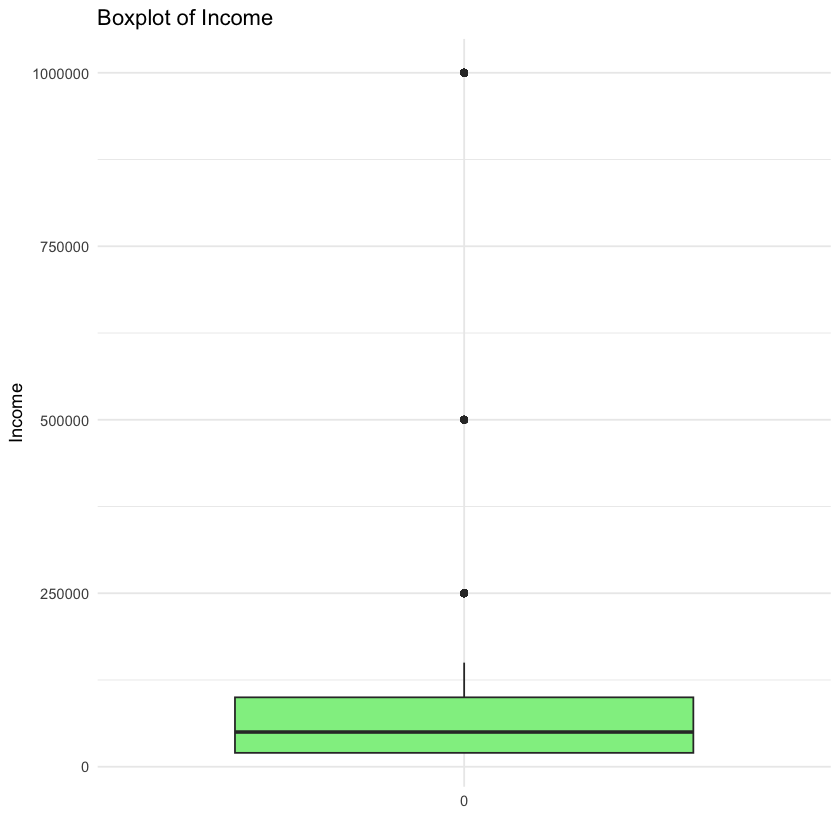

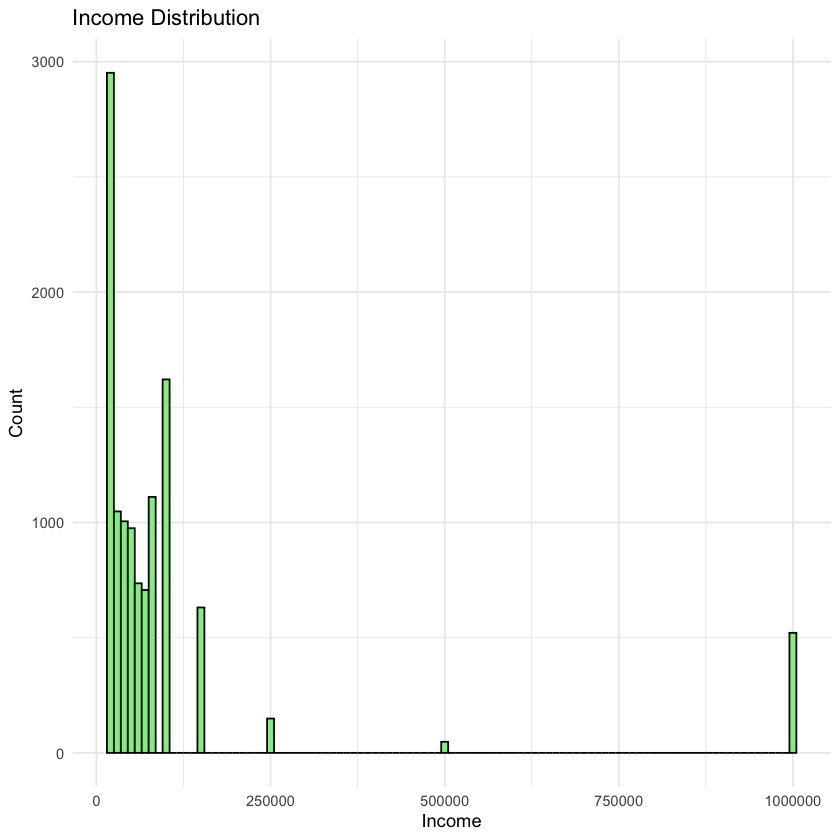

In [41]:
# Income analysis

# Summary of income column
summary(df_eda$income)

# Check for invalid income values (income > 1,000,000)
invalid_income <- df_eda %>%
  filter(income > 1000000)

# Calculate percentage of invalid income records
invalid_income_count <- nrow(invalid_income)
invalid_income_percentage <- (invalid_income_count / nrow(df_eda)) * 100

cat("Number of invalid income records: ", invalid_income_count, "\n")
cat("Percentage of invalid income records: ", invalid_income_percentage, "%\n")

# Visualize income with a boxplot
ggplot(df_eda, aes(x = factor(0), y = income)) +
  geom_boxplot(fill = "lightgreen") +
  theme_minimal() +
  labs(title = "Boxplot of Income", x = "", y = "Income")

# Plot income distribution
ggplot(df_eda, aes(x = income)) +
  geom_histogram(binwidth = 10000, fill = "lightgreen", color = "black") +
  theme_minimal() +
  labs(title = "Income Distribution", x = "Income", y = "Count")

There are some outliers we want to understand better. Although they could be real, let's see all those records equal or above $500,000.

In [62]:
# Count records in df_eda_clean where income > 500000
count_high_income <- df_eda_clean %>%
  filter(income > 500000) %>%
  nrow()

# Print the count of records with income > 250000
cat("Number of records in df_eda_clean with income > 500000: ", count_high_income, "\n")

Number of records in df_eda_clean with income > 500000:  507 


As we can see, users with $500,000 or higher represent 0.85% of our users. Let's check the data again ignoring those records. 

In [60]:
# Filter out records with income >= 500000 but keep records with no income (NA)
df_income_clean <- df_eda_clean %>%
  filter(is.na(income) | income < 500000)

# Print the number of records in df_income_clean to verify
cat("Number of records in df_income_clean after removing income >= 500000 (while keeping NA): ", nrow(df_income_clean), "\n")

Number of records in df_income_clean after removing income >= 500000 (while keeping NA):  59025 


Let's see how many records have income different to null.

In [61]:
# Count records where income is not null (i.e., not NA)
count_non_null_income <- df_eda_clean %>%
  filter(!is.na(income)) %>%
  nrow()

# Print the count of records with non-null income
cat("Number of records with non-null income: ", count_non_null_income, "\n")

Number of records with non-null income:  11439 


This result shows that less than 20% of the users have income data and that we are not sure about the veracity of 507 records.

### last_online

This field tells us the date of the latest connection to our system. Let's see the range of dates.

In [48]:
# Ensure that the last_online column is in the correct datetime format
df_eda$last_online <- as.POSIXct(df_eda$last_online, format = "%Y-%m-%d %H:%M:%S", tz = "UTC")

# Find the oldest date (minimum date)
oldest_date <- min(df_eda$last_online, na.rm = TRUE)

# Find the newest date (maximum date)
newest_date <- max(df_eda$last_online, na.rm = TRUE)

# Print the results
print(paste("Oldest date:", oldest_date))
print(paste("Newest date:", newest_date))

[1] "Oldest date: 2011-06-27 01:52:00"
[1] "Newest date: 2012-07-01 08:57:00"


Let's see how many users connected for the last time on each of these months.

# A tibble: 14 x 2
   `Year-Month` Users
   <chr>        <int>
 1 2011-06         85
 2 2011-07        627
 3 2011-08        643
 4 2011-09        702
 5 2011-10        804
 6 2011-11        849
 7 2011-12        989
 8 2012-01       1241
 9 2012-02       1330
10 2012-03       1885
11 2012-04       2469
12 2012-05       3761
13 2012-06      42471
14 2012-07       2090


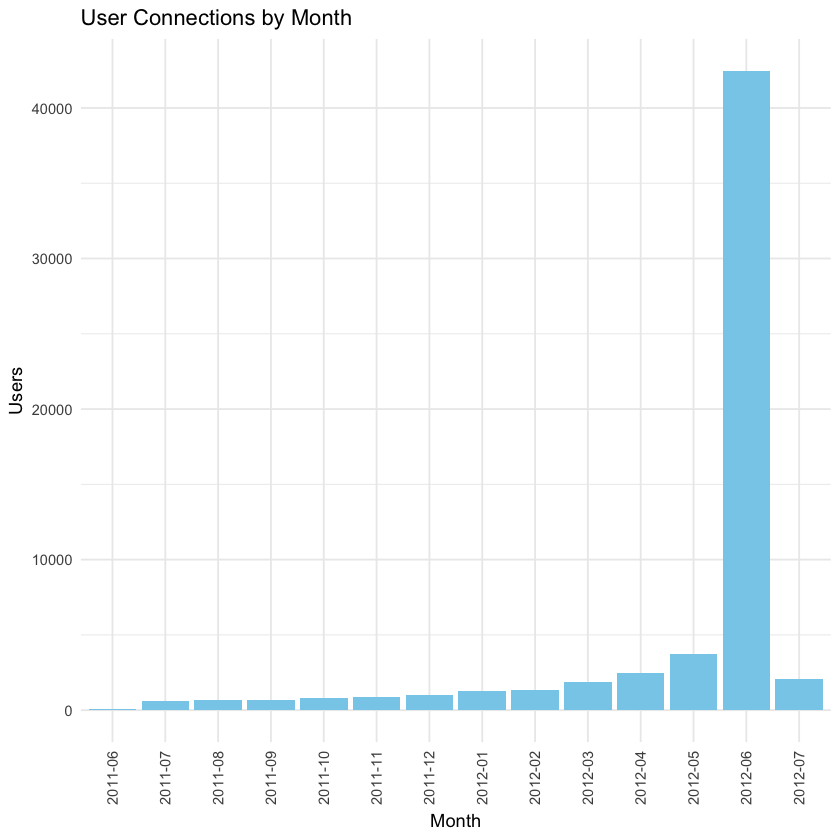

In [55]:
# Ensure that the last_online column is in the correct datetime format
df_eda$last_online <- as.POSIXct(df_eda$last_online, format = "%Y-%m-%d %H:%M:%S", tz = "UTC")

# Extract year and month from the last_online column and create a new column 'year_month'
df_eda$year_month <- format(df_eda$last_online, "%Y-%m")

# Count the number of users per month
monthly_counts <- df_eda %>%
  group_by(year_month) %>%
  summarise(user_count = n()) %>%
  arrange(year_month)

# Rename the columns to 'Year-Month' and 'Users'
monthly_counts <- monthly_counts %>%
  rename(`Year-Month` = year_month, Users = user_count)

# Print the renamed monthly_counts table
print(monthly_counts)

# Plot the bar graph using ggplot2
ggplot(monthly_counts, aes(x = `Year-Month`, y = Users)) +
  geom_bar(stat = "identity", fill = "skyblue") +  # Create the bar graph
  theme_minimal() +  # Use a minimal theme
  labs(title = "User Connections by Month", x = "Month", y = "Users") +  # Labels
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))  # Rotate the x-axis labels for better readability

### Records with complete data

In [63]:
# Now let's check how many records have complete data (i.e., no missing values in any column)
complete_records <- df_eda_clean[complete.cases(df_eda_clean), ]

# Calculate the percentage of records with complete data
complete_data_count <- nrow(complete_records)
complete_data_percentage <- (complete_data_count / nrow(df_eda_clean)) * 100

cat("Number of complete records: ", complete_data_count, "\n")
cat("Percentage of complete records: ", complete_data_percentage, "%\n")

Number of complete records:  2064 
Percentage of complete records:  3.464308 %


Since only 3.46% of our users have complete records, it is necessary to keep all of them until further analysis.

### age vs. income

We know that only 11439 users have income data. Also, we suspect that 507 of those records may have inflated income. However, let's combine age and income to better understand our users.

`summarise()` has grouped output by 'age_bucket'. You can override using the
`.groups` argument.


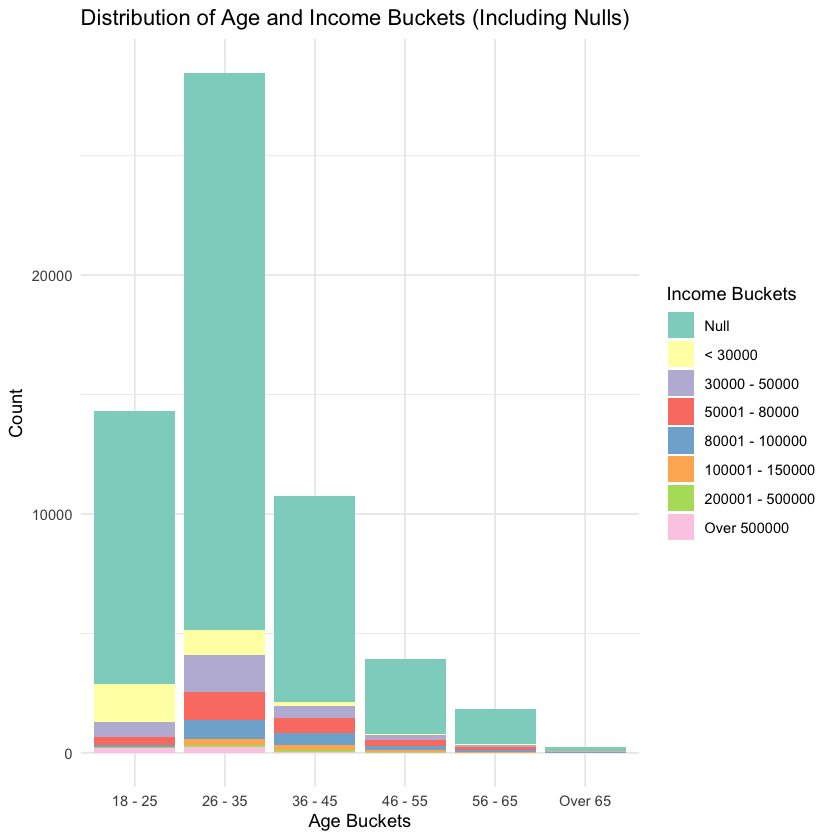

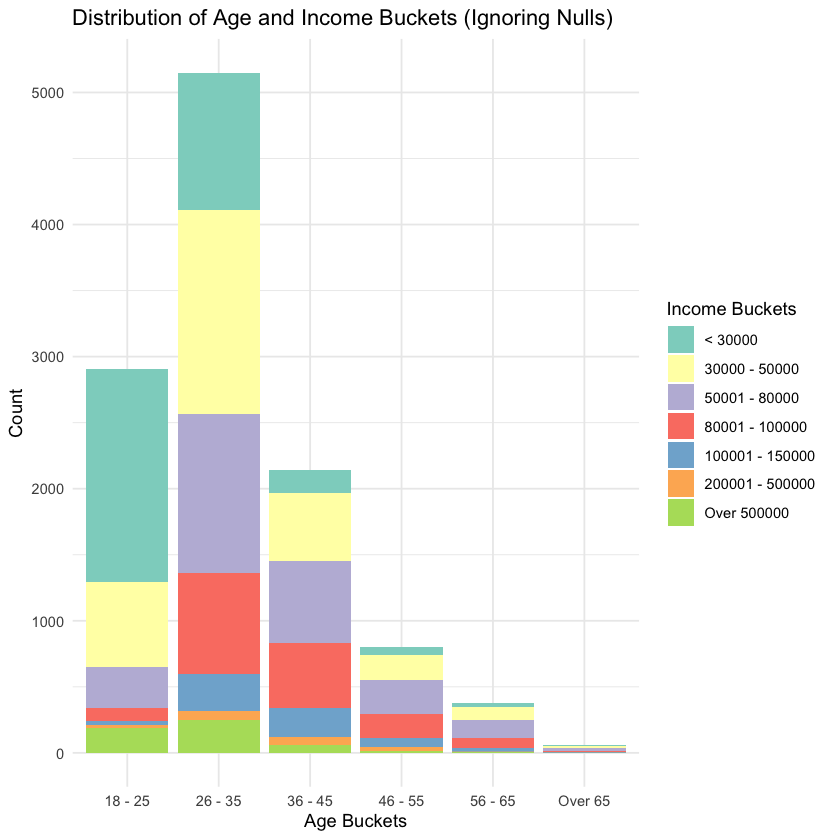

In [84]:
# Step 1: Create Age Buckets
df_eda_clean <- df_eda_clean %>%
  mutate(age_bucket = case_when(
    age >= 18 & age <= 25 ~ "18 - 25",
    age >= 26 & age <= 35 ~ "26 - 35",
    age >= 36 & age <= 45 ~ "36 - 45",
    age >= 46 & age <= 55 ~ "46 - 55",
    age >= 56 & age <= 65 ~ "56 - 65",
    age > 65 ~ "Over 65"
  ))

# Step 2: Create Income Buckets and define factor levels for correct legend order
df_eda_clean <- df_eda_clean %>%
  mutate(income_bucket = case_when(
    is.na(income) ~ "Null",
    income < 30000 ~ "< 30000",
    income >= 30000 & income <= 50000 ~ "30000 - 50000",
    income >= 50001 & income <= 80000 ~ "50001 - 80000",
    income >= 80001 & income <= 100000 ~ "80001 - 100000",
    income >= 100001 & income <= 150000 ~ "100001 - 150000",
    income >= 150001 & income <= 200000 ~ "150001 - 200000",
    income >= 200001 & income <= 500000 ~ "200001 - 500000",
    income > 500000 ~ "Over 500000"
  )) %>%
  # Set the factor levels to match the desired order in the legend
  mutate(income_bucket = factor(income_bucket, levels = c(
    "Null", "< 30000", "30000 - 50000", "50001 - 80000", 
    "80001 - 100000", "100001 - 150000", "150001 - 200000", 
    "200001 - 500000", "Over 500000"
  )))

# Step 3: Summarize the data by age_bucket and income_bucket
df_summary <- df_eda_clean %>%
  group_by(age_bucket, income_bucket) %>%
  summarise(count = n()) %>%
  ungroup()

# Step 4: Generate the first graph including Nulls
ggplot(df_summary, aes(x = age_bucket, y = count, fill = income_bucket)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Distribution of Age and Income Buckets (Including Nulls)", x = "Age Buckets", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
  scale_fill_brewer(palette = "Set3", name = "Income Buckets")

# Step 5: Filter out the Null income bucket
df_summary_no_nulls <- df_summary %>%
  filter(income_bucket != "Null")

# Step 6: Generate the second graph ignoring Nulls
ggplot(df_summary_no_nulls, aes(x = age_bucket, y = count, fill = income_bucket)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Distribution of Age and Income Buckets (Ignoring Nulls)", x = "Age Buckets", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
  scale_fill_brewer(palette = "Set3", name = "Income Buckets")

Let's see the numbers.

In [85]:
df_summary

age_bucket,income_bucket,count
<chr>,<fct>,<int>
18 - 25,Null,11425
18 - 25,< 30000,1609
18 - 25,30000 - 50000,645
18 - 25,50001 - 80000,313
18 - 25,80001 - 100000,95
18 - 25,100001 - 150000,28
18 - 25,200001 - 500000,28
18 - 25,Over 500000,185
26 - 35,Null,23323


### income vs. education

Let's analyze the relationship between income and education.

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


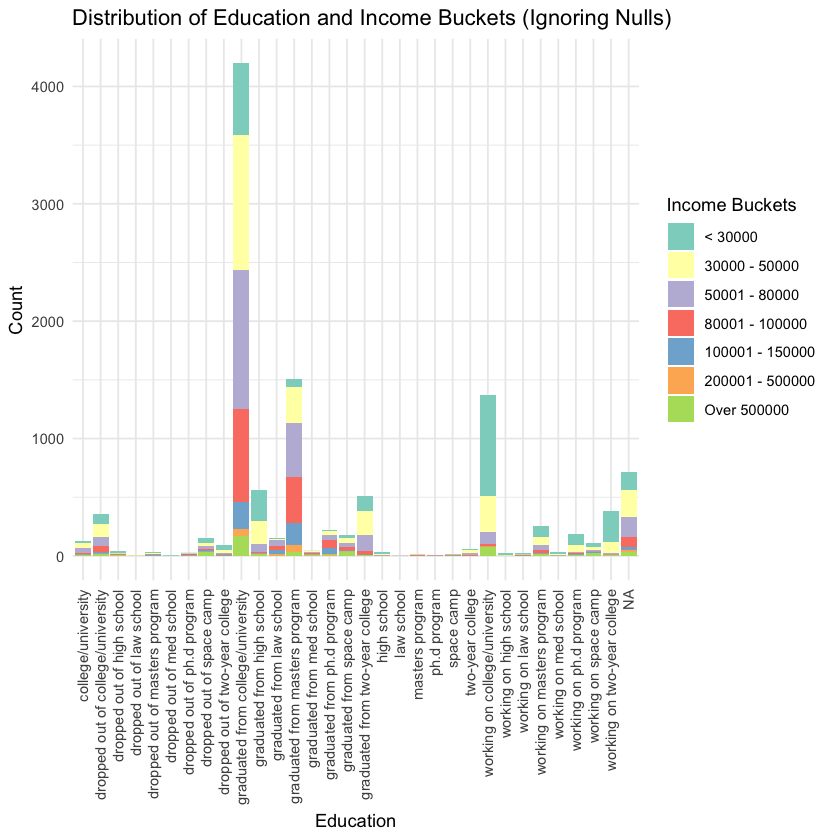

In [86]:
# Step 1: Create Income Buckets and define factor levels for correct legend order
df_eda_clean <- df_eda_clean %>%
  mutate(income_bucket = case_when(
    is.na(income) ~ "Null",
    income < 30000 ~ "< 30000",
    income >= 30000 & income <= 50000 ~ "30000 - 50000",
    income >= 50001 & income <= 80000 ~ "50001 - 80000",
    income >= 80001 & income <= 100000 ~ "80001 - 100000",
    income >= 100001 & income <= 150000 ~ "100001 - 150000",
    income >= 150001 & income <= 200000 ~ "150001 - 200000",
    income >= 200001 & income <= 500000 ~ "200001 - 500000",
    income > 500000 ~ "Over 500000"
  )) %>%
  # Set the factor levels to match the desired order in the legend
  mutate(income_bucket = factor(income_bucket, levels = c(
    "Null", "< 30000", "30000 - 50000", "50001 - 80000", 
    "80001 - 100000", "100001 - 150000", "150001 - 200000", 
    "200001 - 500000", "Over 500000"
  )))

# Step 2: Use Education Data (assuming the 'education' column exists in df_eda_clean)

# Step 3: Summarize the data by income_bucket and education
df_summary_edu_income <- df_eda_clean %>%
  group_by(education, income_bucket) %>%
  summarise(count = n()) %>%
  ungroup()

# Step 5: Filter out the Null income bucket
df_summary_edu_income_no_nulls <- df_summary_edu_income %>%
  filter(income_bucket != "Null")

# Step 6: Generate the second graph ignoring Nulls
ggplot(df_summary_edu_income_no_nulls, aes(x = education, y = count, fill = income_bucket)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Distribution of Education and Income Buckets (Ignoring Nulls)", x = "Education", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  scale_fill_brewer(palette = "Set3", name = "Income Buckets")

Let's focus on salaries greater than $100,000.

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


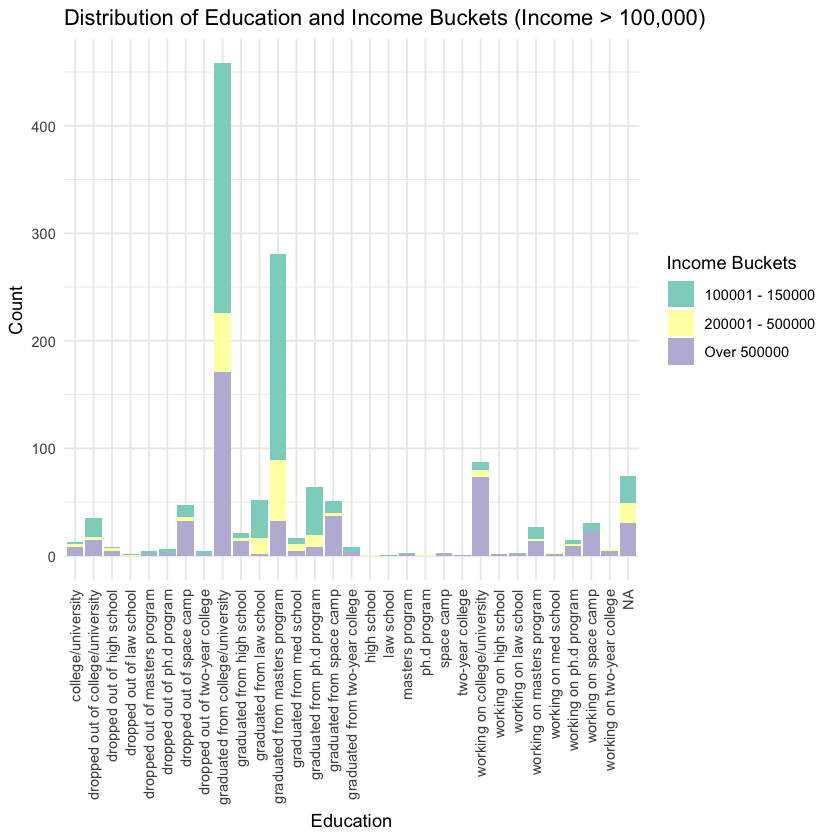

In [87]:
# Step 1: Create Income Buckets and define factor levels for correct legend order
df_eda_clean <- df_eda_clean %>%
  mutate(income_bucket = case_when(
    is.na(income) ~ "Null",
    income < 30000 ~ "< 30000",
    income >= 30000 & income <= 50000 ~ "30000 - 50000",
    income >= 50001 & income <= 80000 ~ "50001 - 80000",
    income >= 80001 & income <= 100000 ~ "80001 - 100000",
    income >= 100001 & income <= 150000 ~ "100001 - 150000",
    income >= 150001 & income <= 200000 ~ "150001 - 200000",
    income >= 200001 & income <= 500000 ~ "200001 - 500000",
    income > 500000 ~ "Over 500000"
  )) %>%
  # Set the factor levels to match the desired order in the legend
  mutate(income_bucket = factor(income_bucket, levels = c(
    "100001 - 150000", "150001 - 200000", "200001 - 500000", "Over 500000"
  )))

# Step 2: Use Education Data (assuming the 'education' column exists in df_eda_clean)

# Step 3: Summarize the data by income_bucket and education, but filter out buckets lower than 100000
df_summary_edu_income_high <- df_eda_clean %>%
  filter(income_bucket %in% c("100001 - 150000", "150001 - 200000", "200001 - 500000", "Over 500000")) %>%
  group_by(education, income_bucket) %>%
  summarise(count = n()) %>%
  ungroup()

# Step 4: Generate the graph showing only income buckets higher than 100,000
ggplot(df_summary_edu_income_high, aes(x = education, y = count, fill = income_bucket)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Distribution of Education and Income Buckets (Income > 100,000)", x = "Education", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  scale_fill_brewer(palette = "Set3", name = "Income Buckets")

### education vs. status

I am looking for an elite group, where users have 

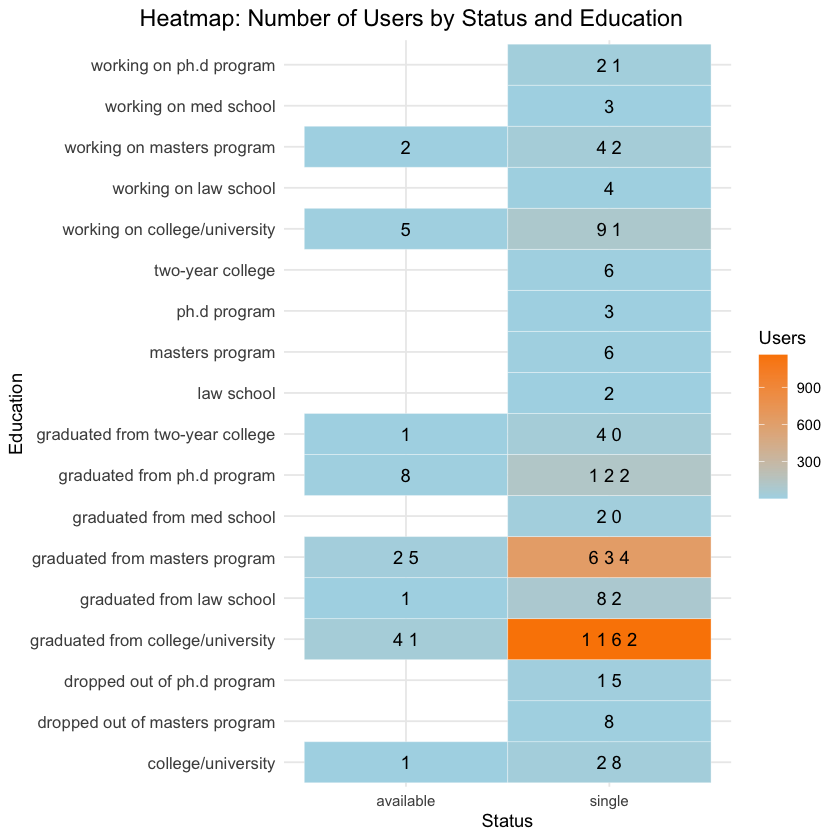

In [118]:
# Function to add space between characters
add_spaces <- function(x) {
  paste(strsplit(as.character(x), "")[[1]], collapse = " ")
}

# Step 1: Filter out records and specific education levels
df_filtered <- df_eda_clean %>%
  filter(!is.na(income), income > 80000, 
         !status %in% c("married", "seeing someone"),
         !education %in% c(
           "dropped out of high school", 
           "working on high school", 
           "graduated from high school", 
           "dropped out of college/university", 
           "dropped out of law school",
           "dropped out of space camp",
           "dropped out of two-year college",
           "high school",
           "working on two-year college",
           "graduated from space camp",
           "space camp",
           "working on space camp",
           NA))

# Step 2: Create income buckets for the remaining data
df_filtered <- df_filtered %>%
  mutate(income_bucket = case_when(
    income > 80000 & income <= 100000 ~ "80001 - 100000",
    income >= 100001 & income <= 150000 ~ "100001 - 150000",
    income >= 150001 & income <= 200000 ~ "150001 - 200000",
    income >= 200001 & income <= 500000 ~ "200001 - 500000",
    income > 500000 ~ "Over 500000"
  ))

# Step 3: Summarize the data to count the number of users for each combination of education and status (ignore income_bucket here)
df_summary <- df_filtered %>%
  group_by(education, status) %>%
  summarise(count = n(), .groups = 'drop')

# Step 4: Apply the function to add space between characters for counts
df_summary$label <- sapply(df_summary$count, add_spaces)

# Step 5: Create the heatmap without scale limits and with adjusted text
ggplot(df_summary, aes(x = status, y = education, fill = count)) +  # Switch x and y axes
  geom_tile(color = "white") +  # Create heatmap tiles
  geom_text(aes(label = label), color = "black") +  # Add spaced count labels
  scale_fill_gradient(low = "lightblue", high = "#fb8600", name = "Users") +  # Removed scale limits to allow automatic range
  labs(title = "Heatmap: Number of Users by Status and Education",
       x = "Status",
       y = "Education") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 1.5, size = 14),  # Center and increase title size
        axis.text.x = element_text(angle = 0, hjust = 0.5, size = 9),  # Keep x-axis labels horizontal
        axis.text.y = element_text(size = 10),  # Increase y-axis text size for better readability
        legend.position = "right")  # Keep legend on the right for clarity

Warning message:
"Removed 38630 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


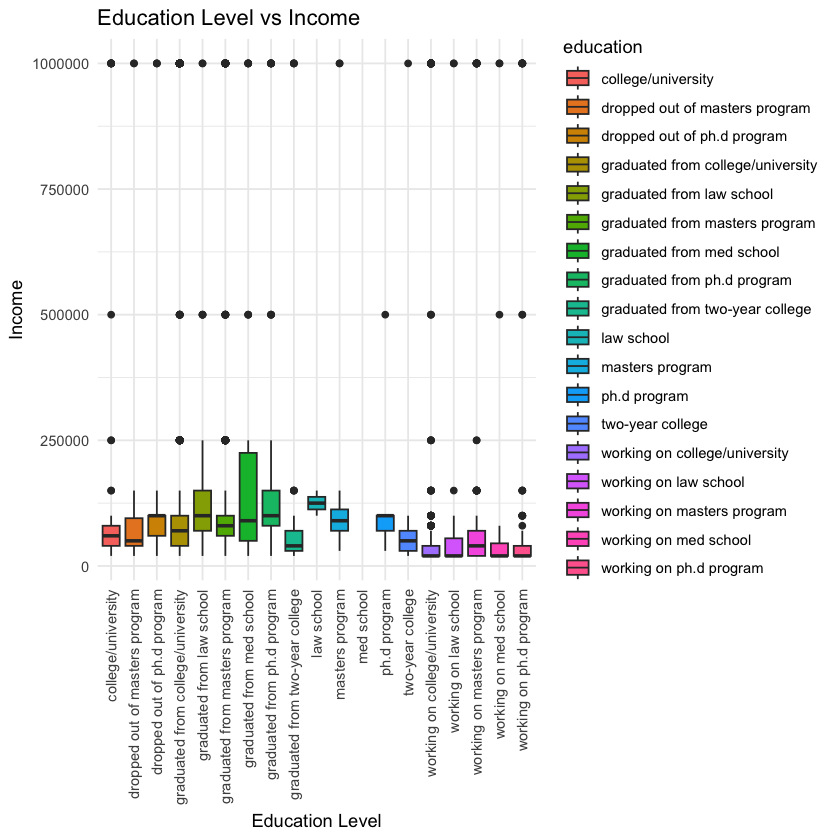

In [76]:
# Step 1: Filter out the specified education levels from df_eda_clean
df_filtered <- df_eda_clean %>%
  filter(!education %in% c(
           "dropped out of high school", 
           "working on high school", 
           "graduated from high school", 
           "dropped out of college/university", 
           "dropped out of law school",
           "dropped out of med school",
           "dropped out of space camp",
           "dropped out of two-year college",
           "high school",
           "working on two-year college",
           "graduated from space camp",
           "space camp",
           "working on space camp",
           NA))

# Step 2: Create the boxplot for education vs. income
ggplot(df_filtered, aes(x = education, y = income, fill = education)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Education Level vs Income", x = "Education Level", y = "Income") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))  # Rotate x-axis labels for readability

### Pet lovers locations

Dog lovers - Top  5 
# A tibble: 5 x 2
  location                  pet_lovers_count
  <chr>                                <int>
1 san francisco, california            18738
2 oakland, california                   4580
3 berkeley, california                  2541
4 san mateo, california                  804
5 palo alto, california                  606


Cat lovers - Top  5 
# A tibble: 5 x 2
  location                  pet_lovers_count
  <chr>                                <int>
1 san francisco, california            12354
2 oakland, california                   3542
3 berkeley, california                  2022
4 san mateo, california                  562
5 alameda, california                    432


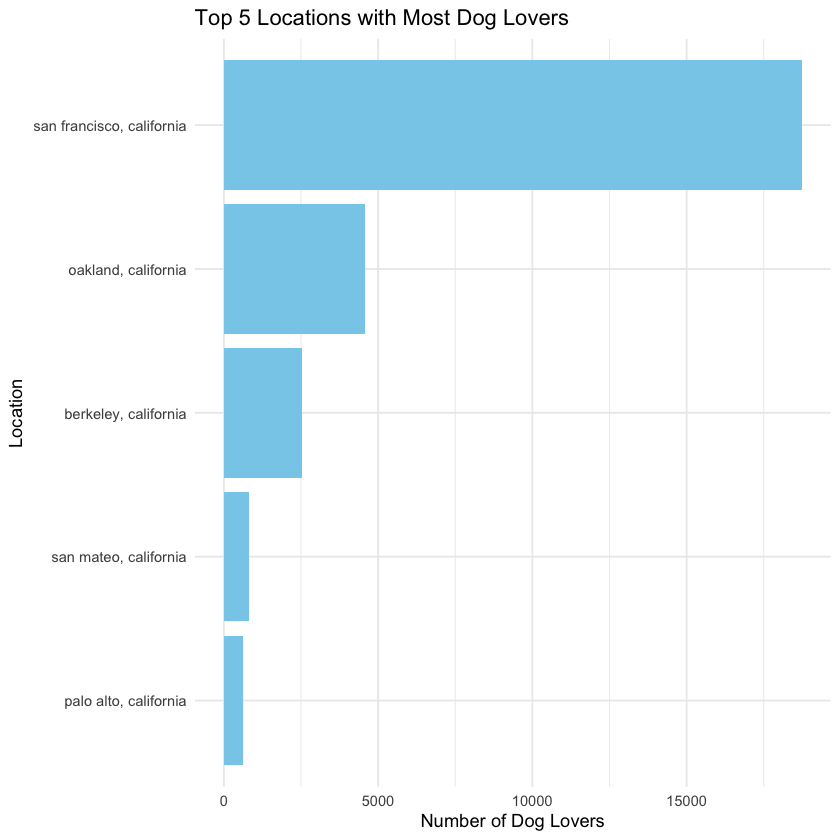

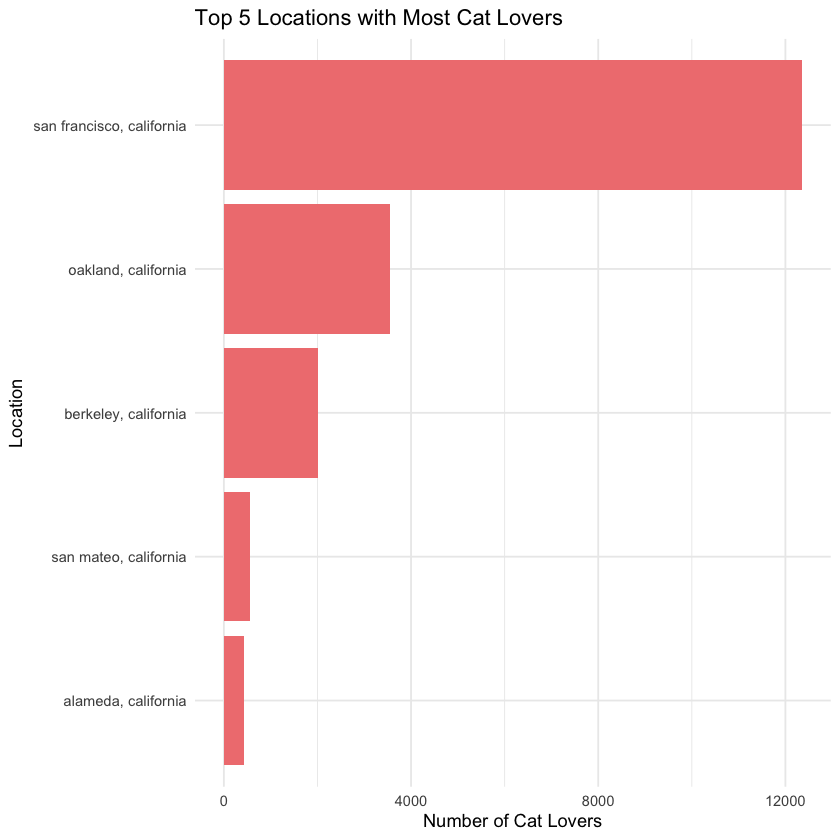

In [61]:
# Function to list top n locations where there are more pet lovers and plot the results
top_pet_lovers <- function(df, pet_type, n) {
  # Check if the pet_type is valid
  if (!(pet_type %in% c("dog", "cat"))) {
    stop("Invalid pet type. Use 'dog' or 'cat'.")
  }
  
  # Determine the column to filter based on the pet_type
  pet_column <- ifelse(pet_type == "dog", "dog_friendly", "cat_friendly")
  
  # Summarize the data by location for the given pet type
  top_locations <- df %>%
    filter(!!sym(pet_column) == TRUE) %>%  # Filter for pet lovers (dog or cat)
    group_by(location) %>%
    summarise(pet_lovers_count = n()) %>%
    arrange(desc(pet_lovers_count)) %>%  # Sort by the number of pet lovers
    head(n)  # Return top n locations
  
  # Return the top n locations
  return(top_locations)
}

# Number of top locations to show
n = 5

# Example usage of the function for dog lovers
cat("Dog lovers - Top ", n, "\n")
top_dog_lovers <- top_pet_lovers(df_eda_clean, pet_type = "dog", n = n)
print(top_dog_lovers)

# Plot the top dog lover locations
ggplot(top_dog_lovers, aes(x = reorder(location, pet_lovers_count), y = pet_lovers_count)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +  # Flip coordinates to make location labels readable
  labs(title = paste("Top", n, "Locations with Most Dog Lovers"), x = "Location", y = "Number of Dog Lovers") +
  theme_minimal()

# Example usage of the function for cat lovers
cat("\n\nCat lovers - Top ", n, "\n")
top_cat_lovers <- top_pet_lovers(df_eda_clean, pet_type = "cat", n = n)
print(top_cat_lovers)

# Plot the top cat lover locations
ggplot(top_cat_lovers, aes(x = reorder(location, pet_lovers_count), y = pet_lovers_count)) +
  geom_bar(stat = "identity", fill = "lightcoral") +
  coord_flip() +  # Flip coordinates to make location labels readable
  labs(title = paste("Top", n, "Locations with Most Cat Lovers"), x = "Location", y = "Number of Cat Lovers") +
  theme_minimal()

### age vs. orientation

# A tibble: 18 x 3
   age_bucket orientation count
   <chr>      <chr>       <int>
 1 18-25      bisexual     1072
 2 18-25      gay          1445
 3 18-25      straight    11937
 4 26-35      bisexual     1166
 5 26-35      gay          2501
 6 26-35      straight    24954
 7 36-45      bisexual      385
 8 36-45      gay          1012
 9 36-45      straight     9406
10 46-55      bisexual      113
11 46-55      gay           476
12 46-55      straight     3373
13 56-65      bisexual       27
14 56-65      gay           128
15 56-65      straight     1688
16 Over 65    bisexual        4
17 Over 65    gay            11
18 Over 65    straight      248


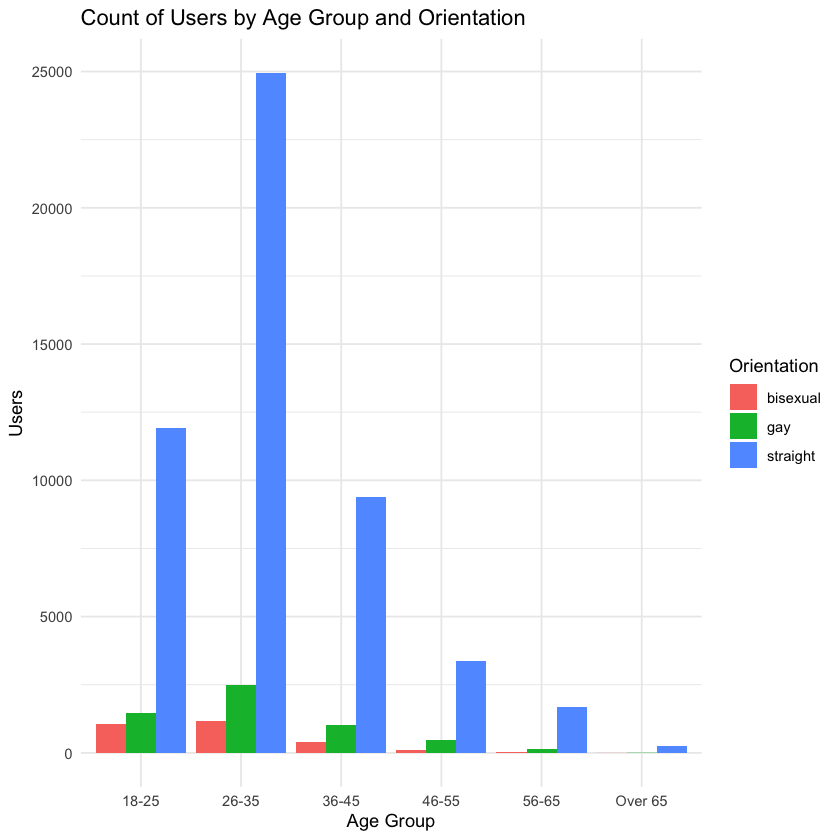

In [60]:
# 1. Create age buckets
df_eda <- df_eda %>%
  mutate(age_bucket = case_when(
    age >= 18 & age <= 25 ~ "18-25",
    age >= 26 & age <= 35 ~ "26-35",
    age >= 36 & age <= 45 ~ "36-45",
    age >= 46 & age <= 55 ~ "46-55",
    age >= 56 & age <= 65 ~ "56-65",
    age > 65 ~ "Over 65",
    TRUE ~ NA_character_  # To handle missing or invalid age values
  ))

# 2. Group by age bucket and orientation, and count the number of users in each combination
age_orientation_counts <- df_eda %>%
  filter(!is.na(age_bucket)) %>%  # Exclude rows with missing or invalid age
  group_by(age_bucket, orientation) %>%
  summarise(count = n(), .groups = 'drop')  # Count users per combination

# Print the table with age bucket, orientation, and count
print(age_orientation_counts)

# 3. Plot the bar graph
ggplot(age_orientation_counts, aes(x = age_bucket, y = count, fill = orientation)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create a dodged bar graph
  theme_minimal() +  # Use a minimal theme
  labs(title = "Count of Users by Age Group and Orientation",
       x = "Age Group",
       y = "Users",
       fill = "Orientation") +  # Add axis labels and legend title
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))  # Rotate x-axis labels for better readability